# Data Set up

In [196]:
#Package
import numpy as np


from libpysal import weights
from pysal.explore import esda
from splot import esda as esdaplot  #for an easy way to plot cluster map
import folium  

import warnings
warnings.simplefilter('ignore')

# Import the necessary libraries
import osmnx as ox
import networkx as nx
import pandana
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import seaborn as sns
from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon
import urllib
import zipfile
import re
import os


# Libraries for linear regression
from spreg import OLS
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from pysal.model import spreg
from libpysal import weights
from pysal.explore import esda

# Libraries required to perform GWR and MGWR
import pysal
import libpysal
from pysal.model import mgwr
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import shift_colormap, truncate_colormap
from descartes import PolygonPatch
from libpysal.weights.contiguity import Queen

%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import shutup;shutup.please()

In [311]:
df = pd.read_csv('Data/IGS_DF.csv')
df

,NAME_EN,DSW22,DSW21,DSW20,DSW19,C&I22,C&I21,C&I20,C&I19,MSW22,...,MedAge21,MedAge20,MedAge19,EduSec22,EduSec21,EduSec20,EduSec19,TotResto,TotConstr,TotSA
0,Central and Western District,305.0,291.0,271.0,295.0,232.0,225.0,211.0,224.0,537.0,...,44.0,45.0,44.0,90.2,89.1,90.4,89.3,848.0,73.0,12.55
1,Eastern District,483.0,484.0,459.0,457.0,108.0,125.0,99.0,134.0,591.0,...,48.0,45.0,45.0,84.8,84.3,85.5,85.6,493.0,34.0,18.13
2,Southern District,209.0,220.0,223.0,213.0,47.0,44.0,40.0,56.0,256.0,...,47.0,45.0,44.0,80.5,81.3,81.8,81.0,161.0,38.0,39.40
3,Wan Chai District,188.0,201.0,178.0,217.0,29.0,27.0,38.0,84.0,217.0,...,45.0,45.0,45.0,91.6,90.9,92.6,91.3,903.0,54.0,10.64
4,Kowloon City District,284.0,324.0,309.0,300.0,76.0,72.0,81.0,98.0,360.0,...,44.0,44.0,43.0,86.4,85.3,85.6,86.4,351.0,149.0,10.02
5,Kwun Tong District,479.0,508.0,541.0,501.0,154.0,180.0,190.0,237.0,633.0,...,47.0,45.0,45.0,77.9,78.4,77.8,78.4,257.0,103.0,11.28
6,Sham Shui Po District,403.0,400.0,421.0,399.0,81.0,90.0,82.0,98.0,484.0,...,45.0,44.0,44.0,81.1,79.8,82.2,80.9,465.0,61.0,9.36
7,Wong Tai Sin District,281.0,310.0,328.0,297.0,68.0,74.0,65.0,77.0,349.0,...,49.0,47.0,46.0,75.8,76.3,77.4,76.1,156.0,25.0,9.30
8,Yau Tsim Mong District,526.0,564.0,535.0,544.0,252.0,231.0,244.0,293.0,777.0,...,43.0,44.0,43.0,86.4,86.6,87.9,86.3,1199.0,70.0,6.99
9,Kwai Tsing District,345.0,361.0,346.0,320.0,531.0,524.0,489.0,436.0,876.0,...,47.0,45.0,45.0,77.5,77.6,77.0,77.2,76.0,30.0,23.34


In [313]:
# Read the shapefile
gdf = gpd.read_file('Data/DistrictBoundary_SHP/DCD.shp')
gdf

,OBJECTID,CSDI_ADMIN,AREA_TYPE,AREA_ID,AREA_CODE,NAME_TC,NAME_EN,DATA_OWNER,BEGIN_LIFE,END_LIFESP,SHAPE_Leng,SHAPE_Area,geometry
0,1,2016010104,DCD,D,STH,南區,Southern District,HAD,20160101,None,55137.919257,9.399167e+07,"POLYGON ((834877.498 813336.023, 834879.547 81..."
1,2,2016010102,DCD,B,WC,灣仔區,Wan Chai District,HAD,20160101,None,19729.404551,1.234266e+07,"POLYGON ((838416.486 813233.574, 838405.781 81..."
2,3,2016010101,DCD,A,CW,中西區,Central and Western District,HAD,20160101,None,21739.940418,1.975501e+07,"POLYGON ((833448.123 817616.684, 835295.787 81..."
3,4,2016010103,DCD,C,EST,東區,Eastern District,HAD,20160101,None,29473.756204,2.609391e+07,"POLYGON ((840648.712 817417.701, 843209.829 81..."
4,5,2016010120,DCD,T,ILD,離島區,Islands District,HAD,20160101,None,128854.800709,6.647087e+08,"POLYGON ((825533.723 819286.945, 829364.216 81..."
5,6,2016010105,DCD,E,YTM,油尖旺區,Yau Tsim Mong District,HAD,20160101,None,14892.691647,1.145724e+07,"POLYGON ((836020.740 820846.605, 835893.143 82..."
6,7,2016010110,DCD,J,KT,觀塘區,Kwun Tong District,HAD,20160101,None,20991.233027,1.396281e+07,"POLYGON ((841126.375 821718.750, 841135.312 82..."
7,8,2016010106,DCD,F,SSP,深水埗區,Sham Shui Po District,HAD,20160101,None,19592.991899,1.079890e+07,"POLYGON ((835840.587 823041.390, 835971.233 82..."
8,9,2016010107,DCD,G,KLC,九龍城區,Kowloon City District,HAD,20160101,None,22103.657281,1.444317e+07,"POLYGON ((836533.557 823323.846, 836720.427 82..."
9,10,2016010108,DCD,H,WTS,黃大仙區,Wong Tai Sin District,HAD,20160101,None,16408.032599,9.302607e+06,"POLYGON ((841126.375 821718.750, 841120.375 82..."


In [314]:
df_merge = pd.merge(df, gdf, how = 'inner', on="NAME_EN", )
df_merge

,NAME_EN,DSW22,DSW21,DSW20,DSW19,C&I22,C&I21,C&I20,C&I19,MSW22,...,AREA_TYPE,AREA_ID,AREA_CODE,NAME_TC,DATA_OWNER,BEGIN_LIFE,END_LIFESP,SHAPE_Leng,SHAPE_Area,geometry
0,Central and Western District,305.0,291.0,271.0,295.0,232.0,225.0,211.0,224.0,537.0,...,DCD,A,CW,中西區,HAD,20160101,None,21739.940418,1.975501e+07,"POLYGON ((833448.123 817616.684, 835295.787 81..."
1,Eastern District,483.0,484.0,459.0,457.0,108.0,125.0,99.0,134.0,591.0,...,DCD,C,EST,東區,HAD,20160101,None,29473.756204,2.609391e+07,"POLYGON ((840648.712 817417.701, 843209.829 81..."
2,Southern District,209.0,220.0,223.0,213.0,47.0,44.0,40.0,56.0,256.0,...,DCD,D,STH,南區,HAD,20160101,None,55137.919257,9.399167e+07,"POLYGON ((834877.498 813336.023, 834879.547 81..."
3,Wan Chai District,188.0,201.0,178.0,217.0,29.0,27.0,38.0,84.0,217.0,...,DCD,B,WC,灣仔區,HAD,20160101,None,19729.404551,1.234266e+07,"POLYGON ((838416.486 813233.574, 838405.781 81..."
4,Kowloon City District,284.0,324.0,309.0,300.0,76.0,72.0,81.0,98.0,360.0,...,DCD,G,KLC,九龍城區,HAD,20160101,None,22103.657281,1.444317e+07,"POLYGON ((836533.557 823323.846, 836720.427 82..."
5,Kwun Tong District,479.0,508.0,541.0,501.0,154.0,180.0,190.0,237.0,633.0,...,DCD,J,KT,觀塘區,HAD,20160101,None,20991.233027,1.396281e+07,"POLYGON ((841126.375 821718.750, 841135.312 82..."
6,Sham Shui Po District,403.0,400.0,421.0,399.0,81.0,90.0,82.0,98.0,484.0,...,DCD,F,SSP,深水埗區,HAD,20160101,None,19592.991899,1.079890e+07,"POLYGON ((835840.587 823041.390, 835971.233 82..."
7,Wong Tai Sin District,281.0,310.0,328.0,297.0,68.0,74.0,65.0,77.0,349.0,...,DCD,H,WTS,黃大仙區,HAD,20160101,None,16408.032599,9.302607e+06,"POLYGON ((841126.375 821718.750, 841120.375 82..."
8,Yau Tsim Mong District,526.0,564.0,535.0,544.0,252.0,231.0,244.0,293.0,777.0,...,DCD,E,YTM,油尖旺區,HAD,20160101,None,14892.691647,1.145724e+07,"POLYGON ((836020.740 820846.605, 835893.143 82..."
9,Kwai Tsing District,345.0,361.0,346.0,320.0,531.0,524.0,489.0,436.0,876.0,...,DCD,S,KC,葵青區,HAD,20160101,None,43192.849439,4.931730e+07,"POLYGON ((833398.346 826785.829, 833433.289 82..."


In [315]:
gdf_merge = gpd.GeoDataFrame(df_merge)  #geopandas
print(type(gdf_merge))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [316]:
gdf_IGS = gdf_merge.drop(['END_LIFESP'], axis=1)

In [122]:
#gdf_IGS = gdf_IGS.dropna()
#IGS_gdf

In [325]:
IGS_gdf = gdf_IGS.to_crs('EPSG:2326')

In [318]:
#checking coordinate system
IGS_gdf.crs

<Projected CRS: EPSG:2326>
Name: Hong Kong 1980 Grid System
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: China - Hong Kong - onshore and offshore.
- bounds: (113.76, 22.13, 114.51, 22.58)
Coordinate Operation:
- name: Hong Kong 1980 Grid
- method: Transverse Mercator
Datum: Hong Kong 1980
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [320]:
#IGS_gdf=IGS_gdf.drop(['Population'], axis=1)
IGS_gdf

,NAME_EN,DSW22,DSW21,DSW20,DSW19,C&I22,C&I21,C&I20,C&I19,MSW22,...,CSDI_ADMIN,AREA_TYPE,AREA_ID,AREA_CODE,NAME_TC,DATA_OWNER,BEGIN_LIFE,SHAPE_Leng,SHAPE_Area,geometry
0,Central and Western District,305.0,291.0,271.0,295.0,232.0,225.0,211.0,224.0,537.0,...,2016010101,DCD,A,CW,中西區,HAD,20160101,21739.940418,1.975501e+07,"POLYGON ((833448.123 817616.684, 835295.787 81..."
1,Eastern District,483.0,484.0,459.0,457.0,108.0,125.0,99.0,134.0,591.0,...,2016010103,DCD,C,EST,東區,HAD,20160101,29473.756204,2.609391e+07,"POLYGON ((840648.712 817417.701, 843209.829 81..."
2,Southern District,209.0,220.0,223.0,213.0,47.0,44.0,40.0,56.0,256.0,...,2016010104,DCD,D,STH,南區,HAD,20160101,55137.919257,9.399167e+07,"POLYGON ((834877.498 813336.023, 834879.547 81..."
3,Wan Chai District,188.0,201.0,178.0,217.0,29.0,27.0,38.0,84.0,217.0,...,2016010102,DCD,B,WC,灣仔區,HAD,20160101,19729.404551,1.234266e+07,"POLYGON ((838416.486 813233.574, 838405.781 81..."
4,Kowloon City District,284.0,324.0,309.0,300.0,76.0,72.0,81.0,98.0,360.0,...,2016010107,DCD,G,KLC,九龍城區,HAD,20160101,22103.657281,1.444317e+07,"POLYGON ((836533.557 823323.846, 836720.427 82..."
5,Kwun Tong District,479.0,508.0,541.0,501.0,154.0,180.0,190.0,237.0,633.0,...,2016010110,DCD,J,KT,觀塘區,HAD,20160101,20991.233027,1.396281e+07,"POLYGON ((841126.375 821718.750, 841135.312 82..."
6,Sham Shui Po District,403.0,400.0,421.0,399.0,81.0,90.0,82.0,98.0,484.0,...,2016010106,DCD,F,SSP,深水埗區,HAD,20160101,19592.991899,1.079890e+07,"POLYGON ((835840.587 823041.390, 835971.233 82..."
7,Wong Tai Sin District,281.0,310.0,328.0,297.0,68.0,74.0,65.0,77.0,349.0,...,2016010108,DCD,H,WTS,黃大仙區,HAD,20160101,16408.032599,9.302607e+06,"POLYGON ((841126.375 821718.750, 841120.375 82..."
8,Yau Tsim Mong District,526.0,564.0,535.0,544.0,252.0,231.0,244.0,293.0,777.0,...,2016010105,DCD,E,YTM,油尖旺區,HAD,20160101,14892.691647,1.145724e+07,"POLYGON ((836020.740 820846.605, 835893.143 82..."
9,Kwai Tsing District,345.0,361.0,346.0,320.0,531.0,524.0,489.0,436.0,876.0,...,2016010119,DCD,S,KC,葵青區,HAD,20160101,43192.849439,4.931730e+07,"POLYGON ((833398.346 826785.829, 833433.289 82..."


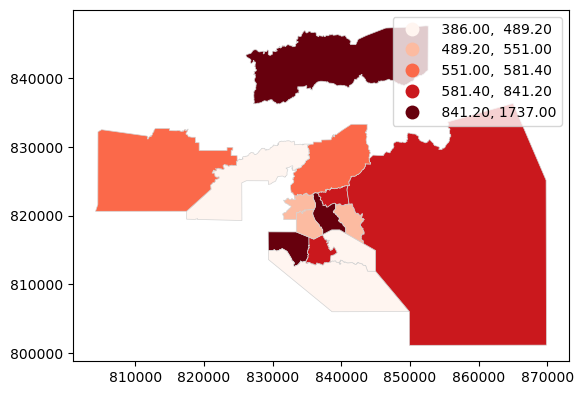

In [321]:
IGS_gdf.plot(column= 'RECYC22', cmap='Reds', 
        scheme='quantiles', legend=True,
        edgecolor="lightgrey", linewidth=0.5)
plt.show()

# Open Street Map Data

In [25]:
#Query Food Industries in Hong Kong
query = 'Hong Kong'
tags = {
    'amenity':[
        'cafe',
        'bar',
        'pub',
        'restaurant',
        'ice_cream',
        'fast_food',
        'food_court',
    ],
    'shop':[
        'bakery',
        'convenience',
        'supermarket',
    ]
}

Restaurants = ox.features.features_from_place(query= query, tags= tags, which_result=None)

In [26]:
Restaurants

amenity    cuisine  \
element_type osmid                               
node         165998818   restaurant       thai   
             278953244          NaN        NaN   
             296035496   restaurant        NaN   
             339050630    fast_food  beef_bowl   
             412685600         cafe        NaN   
...                             ...        ...   
way          1205388328         NaN        NaN   
             1288649595         NaN        NaN   
             1289074954         NaN        NaN   
             1292105522  restaurant        NaN   
             1305661157         NaN        NaN   

                                                         name  \
element_type osmid                                              
node         165998818                                小田泰式雞飯店   
             278953244                             3hreeSixty   
             296035496   上海三六九飯店 369 Restaurant Shanghai Food   
             339050630                          吉野家 Yoshinoya   
             412685600                        Herbal Tea Shop   
...                                                       ...   
way          1205388328                             Star Mart   
             1288649595                                   NaN   
             1289074954                            Tiger Mart   
             1292105522   肥南燒鵝風味小廚 Fat Nam Seafood Restaurant   
             1305661157                             Star Mart   

                                                                  geometry  \
element_type osmid                                                           
node         165998818                          POINT (114.17737 22.27709)   
             278953244                          POINT (114.16237 22.30507)   
             296035496                          POINT (114.17300 22.27880)   
             339050630                          POINT (114.22150 22.28292)   
             412685600                          POINT (114.16727 22.32376)   
...                                                                    ...   
way          1205388328  POLYGON ((114.12552 22.37033, 114.12553 22.370...   
             1288649595  POLYGON ((114.14972 22.48666, 114.14976 22.486...   
             1289074954  POLYGON ((114.03198 22.44364, 114.03198 22.443...   
             1292105522  POLYGON ((113.96601 22.39820, 113.96604 22.398...   
             1305661157  POLYGON ((113.99448 22.43092, 113.99449 22.430...   

                                 brand    brand:en brand:wikidata     name:de  \
element_type osmid                                                              
node         165998818             NaN         NaN            NaN         NaN   
             278953244      3hreeSixty  3hreeSixty       Q7797310  Supermarkt   
             296035496             NaN         NaN            NaN         NaN   
             339050630   吉野家 Yoshinoya   Yoshinoya        Q776272         NaN   
             412685600             NaN         NaN            NaN         NaN   
...                                ...         ...            ...         ...   
way          1205388328      Star Mart         NaN      Q61994857         NaN   
             1288649595            NaN         NaN            NaN         NaN   
             1289074954     Tiger Mart         NaN      Q57643977         NaN   
             1292105522            NaN         NaN            NaN         NaN   
             1305661157            NaN         NaN            NaN         NaN   

                                              name:en         shop  ...  \
element_type osmid                                                  ...   
node         165998818                            NaN          NaN  ...   
             278953244                     3hreeSixty  supermarket  ...   
             296035496   369 Restaurant Shanghai Food          NaN  ...   
             339050630                      Yoshinoya          NaN  ...   
            

In [27]:
#Only include the necessary fields
Restaurants_clean = Restaurants[['addr:city', 'addr:postcode', 'addr:street', 'alt_name', 'amenity',
       'cuisine', 'name', 'opening_hours', 'geometry']]

In [1]:
Resturants['addr:city']

NameError: name 'Resturants' is not defined

In [28]:
# We need to change any polygons geometry as points
Restaurants_clean['geometry'] = Restaurants_clean['geometry'].apply(lambda x: x.centroid if type(x) == Polygon else 
                                                        (x.centroid if type(x) == MultiPolygon else x))

In [37]:
# Let's save them as shapefile
gpd.GeoDataFrame.to_file(Restaurants_clean, "HK Restaurants.shp")

In [30]:
#Query Construction Waste in Hong Kong
query = 'Hong Kong'
tags = {
    'landuse':[
        'construction',
        'brownfield']
}

Construction_site = ox.features.features_from_place(query= query, tags= tags, which_result=None)

In [31]:
Construction_site

landform natural old_name old_name:en old_name:zh  \
element_type osmid                                                         
way          35925464       NaN     NaN      NaN         NaN         NaN   
             38713306       NaN     NaN      NaN         NaN         NaN   
             40490972       NaN     NaN      NaN         NaN         NaN   
             86113243       NaN     NaN      NaN         NaN         NaN   
             106602578   quarry     NaN      NaN         NaN         NaN   
...                         ...     ...      ...         ...         ...   
relation     14098388       NaN     NaN      NaN         NaN         NaN   
             14552819       NaN    sand      NaN         NaN         NaN   
             14552825       NaN     NaN      NaN         NaN         NaN   
             16659299       NaN     NaN      NaN         NaN         NaN   
             16659300       NaN     NaN      NaN         NaN         NaN   

                                                                 geometry  \
element_type osmid                                                          
way          35925464   POLYGON ((114.28845 22.29905, 114.28891 22.298...   
             38713306   POLYGON ((114.18407 22.28219, 114.18412 22.282...   
             40490972   POLYGON ((114.16921 22.28086, 114.16958 22.280...   
             86113243   POLYGON ((114.19425 22.32964, 114.19602 22.328...   
             106602578  POLYGON ((114.23815 22.21990, 114.23798 22.219...   
...                                                                   ...   
relation     14098388   POLYGON ((114.02055 22.44199, 114.02057 22.443...   
             14552819   POLYGON ((114.05021 22.47348, 114.05016 22.473...   
             14552825   POLYGON ((114.05104 22.47926, 114.05161 22.479...   
             16659299   POLYGON ((114.14498 22.50682, 114.14511 22.506...   
             16659300   POLYGON ((114.14580 22.50518, 114.14579 22.505...   

                       addr:housenumber                   addr:street  \
element_type osmid                                                      
way          35925464               NaN                           NaN   
             38713306               281          告士打道 Gloucester Road   
             40490972               NaN                           NaN   
             86113243               NaN                           NaN   
             106602578              NaN                           NaN   
...                                 ...                           ...   
relation     14098388                 6  元朗體育路 Yuen Long Tai Yuk Road   
             14552819               NaN              攸壆路 Yau Pok Road   
             14552825               NaN              攸壆路 Yau Pok Road   
             16659299               NaN                           NaN   
             16659300               NaN                           NaN   

                                addr:street:en addr:street:zh  ...  \
element_type osmid                                             ...   
way          35925464                      NaN            NaN  ...   
             38713306          Gloucester Road           告士打道  ...   
             40490972                      NaN            NaN  ...   
             86113243                      NaN            NaN  ...   
             106602578                     NaN            NaN  ...   
...                                        ...            ...  ...   
relation     14098388   Yuen Long Tai Yuk Road          元朗體育路  ...   
             14552819             Yau Pok Road            攸壆路  ...   
             14552825             Yau Pok Road            攸壆路  ...   
             16659299                      NaN            NaN  ...   
             16659300                      NaN            NaN  ...   

                       addr:place:zh architect architect:en architect:zh  \
element_type osmid                                                         
way          359254

In [34]:
#Only include the necessary fields
Construction_clean = Construction_site[['addr:street:en', 'addr:place:zh', 'addr:street:zh', 'construction:place', 'geometry']]

In [32]:
Construction_site.columns

Index(['landform', 'natural', 'old_name', 'old_name:en', 'old_name:zh',
       'geometry', 'addr:housenumber', 'addr:street', 'addr:street:en',
       'addr:street:zh',
       ...
       'addr:place:zh', 'architect', 'architect:en', 'architect:zh',
       'builder:en', 'junction', 'junction:name', 'junction:name:en',
       'junction:name:zh', 'construction:place'],
      dtype='object', length=600)

In [36]:
# We need to change any polygons geometry as points
Construction_clean['geometry'] = Construction_clean['geometry'].apply(lambda x: x.centroid if type(x) == Polygon else 
                                                        (x.centroid if type(x) == MultiPolygon else x))

In [38]:
# Let's save them as shapefile
gpd.GeoDataFrame.to_file(Construction_clean, "HK_Construction.shp")

# number of points per geometry OPS --> HK geometry 

In [16]:
#Merging District Outline with OPS data
# Read shapefiles
HK_Restaurant = gpd.GeoDataFrame.from_file('Data/HK_Restaurants.shp')
HK_Construction = gpd.GeoDataFrame.from_file('Data/HK_Construction.shp')
 
#Bring the shapefiles into common cordinate system
HK_Restaurant = HK_Restaurant.to_crs('EPSG:2326')
HK_Construction = HK_Construction.to_crs('EPSG:2326')

#Better method Spatial Join
pointsInPolygon = gpd.sjoin(HK_Restaurant, IGS_gdf, how="right", op='intersects')


# Read the data.
# Add a field with 1 as a constant value
#pointsInPolygon['const']=1



#This method not good
#Merge/Combine multiple shapefiles into one
#HK_Dist_Rest_Con = gpd.pd.concat([HK_Restaurant, HK_Construction])
#IGS_gdf = gpd.pd.concat([IGS_gdf, HK_Dist_Rest_Con])

#Export merged geodataframe into shapefile
#north_south_carolina.to_file("north_south_carolina.shp")

In [95]:
#testing IGS_gdf
#IGS_gdf.plot(column= 'MSW22', cmap='Reds', 
        #scheme='quantiles', legend=True,
        #edgecolor="lightgrey", linewidth=0.5)
#works

In [17]:
# Add a field with 1 as a constant value
pointsInPolygon['const']=1

# Group according to the column by which you want to aggregate data
count_df = pointsInPolygon.groupby(['geometry']).sum()
 
#The column ['const'] will give you the count number of points in your multipolygons.**

In [18]:
count_df['const']

geometry
POLYGON ((825533.723 819286.945, 829364.216 81...     345
POLYGON ((833448.123 817616.684, 835295.787 81...     848
POLYGON ((835840.587 823041.390, 835971.233 82...     465
POLYGON ((833398.346 826785.829, 833433.289 82...      76
POLYGON ((835477.302 830400.835, 835471.308 83...     254
POLYGON ((824846.677 828067.314, 824833.125 82...     213
POLYGON ((831228.454 836334.913, 831209.731 83...     177
POLYGON ((844050.118 828262.517, 844053.662 82...     416
POLYGON ((852652.915 847596.316, 852619.988 84...     161
POLYGON ((865002.174 836329.660, 855509.341 83...     254
POLYGON ((849922.503 801122.696, 849900.161 80...     137
POLYGON ((841126.375 821718.750, 841120.375 82...     156
POLYGON ((836533.557 823323.846, 836720.427 82...     351
POLYGON ((836020.740 820846.605, 835893.143 82...    1199
POLYGON ((841126.375 821718.750, 841135.312 82...     257
POLYGON ((840648.712 817417.701, 843209.829 81...     493
POLYGON ((838416.486 813233.574, 838405.781 81...     903
POLYG

In [19]:
count_df

,index_left,element_ty,osmid,addr_city,addr_postc,addr_stree,alt_name,amenity,cuisine,name,...,CSDI_ADMIN,AREA_TYPE,AREA_ID,AREA_CODE,NAME_TC,DATA_OWNER,BEGIN_LIFE,SHAPE_Leng,SHAPE_Area,const
geometry,,,,,,,,,,,,,,,,,,,,,
"POLYGON ((825533.723 819286.945, 829364.216 81...",1862304.0,nodenodenodenodenodenodenodenodenodenodenodeno...,2.033159e+12,??? Lamma IslandCheung Chau??? Lamma Island???...,0,????? Yung Shue Wan Main Street????? Yung Shue...,0,caferestaurantrestaurantfood_courtpubrestauran...,american;burger;fish_and_chipspizzacoffee_shop...,???? BWC Lamma??? Lam Hoi Kee??? Sunny Alley??...,...,2016010120201601012020160101202016010120201601...,DCDDCDDCDDCDDCDDCDDCDDCDDCDDCDDCDDCDDCDDCDDCDD...,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,ILDILDILDILDILDILDILDILDILDILDILDILDILDILDILDI...,離島區離島區離島區離島區離島區離島區離島區離島區離島區離島區離島區離島區離島區離島區離島區離...,HADHADHADHADHADHADHADHADHADHADHADHADHADHADHADH...,2016010120160101201601012016010120160101201601...,4.445491e+07,2.293245e+11,345
"POLYGON ((833448.123 817616.684, 835295.787 81...",4350061.0,nodenodenodenodenodenodenodenodenodenodenodeno...,4.961328e+12,"Hong KongSai Ying Pun, Hong KongCentralCentral...",99907,Hong Kong Park??? Pacific Place Drive????? Edi...,????? Union Restaurant,cafefast_foodcafecafefast_foodcafefast_foodres...,coffee_shopburgercoffee_shopchinesesandwichcan...,?? Wellcome??? Starbucks??? McDonald's??? Star...,...,2016010101201601010120160101012016010101201601...,DCDDCDDCDDCDDCDDCDDCDDCDDCDDCDDCDDCDDCDDCDDCDD...,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,CWCWCWCWCWCWCWCWCWCWCWCWCWCWCWCWCWCWCWCWCWCWCW...,中西區中西區中西區中西區中西區中西區中西區中西區中西區中西區中西區中西區中西區中西區中西區中...,HADHADHADHADHADHADHADHADHADHADHADHADHADHADHADH...,2016010120160101201601012016010120160101201601...,1.843547e+07,1.675225e+10,848
"POLYGON ((835840.587 823041.390, 835971.233 82...",1595582.0,nodenodenodenodenodenodenodenodenodenodenodeno...,2.693464e+12,Sham Shui PoShum Shui Po???? Sham Shui Po Dist...,0,??? Yen Chow StreetUn Chau StreetUn Chau Stree...,0,fast_foodfast_foodfast_foodfast_foodfast_foodr...,burgerburgerburgerburgerchinese;sandwich;noodl...,??? McDonald's??? McDonald's??? McDonald's7-El...,...,2016010106201601010620160101062016010106201601...,DCDDCDDCDDCDDCDDCDDCDDCDDCDDCDDCDDCDDCDDCDDCDD...,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...,SSPSSPSSPSSPSSPSSPSSPSSPSSPSSPSSPSSPSSPSSPSSPS...,深水埗區深水埗區深水埗區深水埗區深水埗區深水埗區深水埗區深水埗區深水埗區深水埗區深水埗區深水...,HADHADHADHADHADHADHADHADHADHADHADHADHADHADHADH...,2016010120160101201601012016010120160101201601...,9.110741e+06,5.021488e+09,465
"POLYGON ((833398.346 826785.829, 833433.289 82...",476102.0,nodenodenodenodenodenodenodenodenodenodenodeno...,4.372753e+11,?? Kwai Chung,0,??? Ching Hong Road???166-174??????3?1?? Shop ...,0,restaurantrestaurantfast_foodfast_foodfast_foo...,burgercantonese;westerndumplingscantonese;west...,7-Eleven?? Wellcome7-Eleven??? McDonald's?? We...,...,2016010119201601011920160101192016010119201601...,DCDDCDDCDDCDDCDDCDDCDDCDDCDDCDDCDDCDDCDDCDDCDD...,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS...,KCKCKCKCKCKCKCKCKCKCKCKCKCKCKCKCKCKCKCKCKCKCKC...,葵青區葵青區葵青區葵青區葵青區葵青區葵青區葵青區葵青區葵青區葵青區葵青區葵青區葵青區葵青區葵...,HADHADHADHADHADHADHADHADHADHADHADHADHADHADHADH...,2016010120160101201601012016010120160101201601...,3.282657e+06,3.748115e+09,76
"POLYGON ((835477.302 830400.835, 835471.308 83...",1627675.0,nodenodenodenodenodenodenodewaywaywaywaynodeno...,1.860703e+12,?? Tsuen WanHong KongHong Kong?? Tsuen Wan?? T...,0,???? Shek Wai Kok RoadPak Lam Road????? Tsuen ...,0,fast_foodfast_foodfast_foodrestaurantrestauran...,chineseamericanice_creamcantonesegermanitalian...,"Popcorn, Cotton Candy, Frozen Lollipops CartFl...",...,2016010111201601011120160101112016010111201601...,DCDDCDDCDDCDDCDDCDDCDDCDDCDDCDDCDDCDDCDDCDDCDD...,KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK...,TWTWTWTWTWTWTWTWTWTWTWTWTWTWTWTWTWTWTWTWTWTWTW...,荃灣區荃灣區荃灣區荃灣區荃灣區荃灣區荃灣區荃灣區荃灣區荃灣區荃灣區荃灣區荃灣區荃灣區荃灣區荃...,HADHADHADHADHADHADHADHADHADHADHADHADHADHADHADH...,2016010120160101201601012016010120160101201601...,1.

# GWR/MGWR Transform

In [125]:
# Checking the distribution of all original house age categories
#for i in IGS_gdf.loc[:,'DSW22':'TotSA'].columns:
    #plt.hist(IGS_gdf[i], bins=5)
    #plt.title(i)
    #plt.show()

In [322]:
#transform data
IGS_gdf2 = IGS_gdf
IGS_gdf2['DSW22'] = np.sqrt(IGS_gdf['DSW22'])
IGS_gdf2['DSW21'] = np.sqrt(IGS_gdf['DSW21'])
IGS_gdf2['DSW20'] = np.sqrt(IGS_gdf['DSW20'])
IGS_gdf2['DSW19'] = np.sqrt(IGS_gdf['DSW19'])
IGS_gdf2['C&I22'] = np.log(IGS_gdf['DSW21'])
IGS_gdf2['C&I21'] = np.log(IGS_gdf['DSW21'])
IGS_gdf2['C&I20'] = np.log(IGS_gdf['DSW21'])
IGS_gdf2['C&I19'] = np.log(IGS_gdf['DSW21'])
IGS_gdf2['MSW22'] = np.sqrt(IGS_gdf['MSW22'])
IGS_gdf2['MSW21'] = np.sqrt(IGS_gdf['MSW21'])
IGS_gdf2['MSW20'] = np.log(IGS_gdf['MSW20'])
IGS_gdf2['MSW19'] = np.log(IGS_gdf['MSW19'])
IGS_gdf2['CW22'] = np.log(IGS_gdf['CW22'])
IGS_gdf2['CW21'] = np.log(IGS_gdf['CW21'])
IGS_gdf2['CW20'] = np.sqrt(IGS_gdf['CW20'])
IGS_gdf2['CW19'] = np.log(IGS_gdf['CW19'])
IGS_gdf2['CFW22'] = np.log10(IGS_gdf['CFW22'])
IGS_gdf2['DFW22'] = np.log(IGS_gdf['DFW22'])
IGS_gdf2['MFW22'] = np.sqrt(IGS_gdf['MFW22'])
IGS_gdf2['RECYC22'] = np.log10(IGS_gdf['RECYC22'])
IGS_gdf2['RECYC21'] = np.sqrt(IGS_gdf['RECYC21'])
IGS_gdf2['TotHHold22'] = np.log(IGS_gdf['TotHHold22'])
IGS_gdf2['TotHHold20'] = np.log10(IGS_gdf['TotHHold20'])
IGS_gdf2['TotHHold19'] = np.log10(IGS_gdf['TotHHold19'])
IGS_gdf2['TotHSize22'] = np.sqrt(IGS_gdf['TotHSize22'])
IGS_gdf2['TotHSize20'] = np.log(IGS_gdf['TotHSize20'])
IGS_gdf2['TotHSize19'] = np.log(IGS_gdf['TotHSize19'])
IGS_gdf2['TotIncome22'] = np.log(IGS_gdf['TotIncome22'])
IGS_gdf2['TotIncome21'] = np.log(IGS_gdf['TotIncome21'])
IGS_gdf2['TotIncome20'] = np.log(IGS_gdf['TotIncome20'])
IGS_gdf2['TotIncome19'] = np.log(IGS_gdf['TotIncome19'])
IGS_gdf2['MedAge22'] = np.log(IGS_gdf['MedAge22'])
IGS_gdf2['MedAge21'] = np.log(IGS_gdf['MedAge21'])
IGS_gdf2['MedAge19'] = np.log(IGS_gdf['MedAge19'])
IGS_gdf2['EduSec20'] = np.log(IGS_gdf['EduSec20'])
IGS_gdf2['EduSec19'] = np.log(IGS_gdf['EduSec19'])
IGS_gdf2['TotResto'] = np.log(IGS_gdf['TotResto'])
IGS_gdf2['TotConstr'] = np.log(IGS_gdf['TotConstr'])
IGS_gdf2['TotSA'] = np.log(IGS_gdf['TotSA'])

In [323]:
IGS_gdf2['RECYC22']

0     3.122871
1     2.640481
2     2.586587
3     2.862131
4     3.239800
5     2.730782
6     2.695482
7     2.768638
8     2.740363
9          NaN
10    3.004751
11    2.838219
12    2.744293
13         NaN
14    2.680336
15    2.747412
16         NaN
Name: RECYC22, dtype: float64

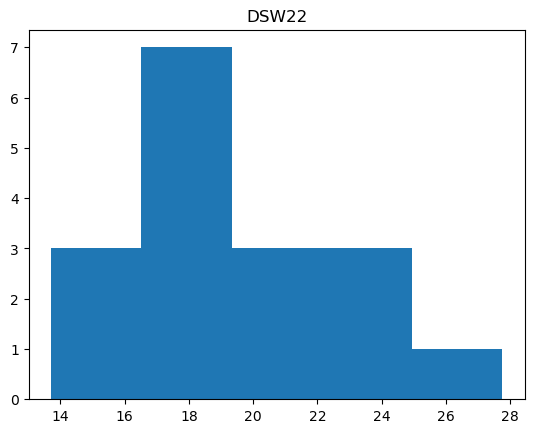

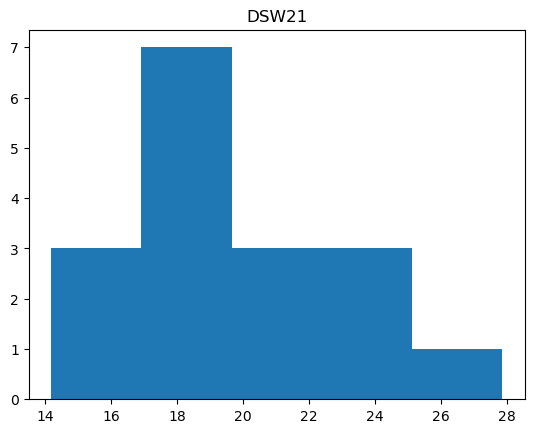

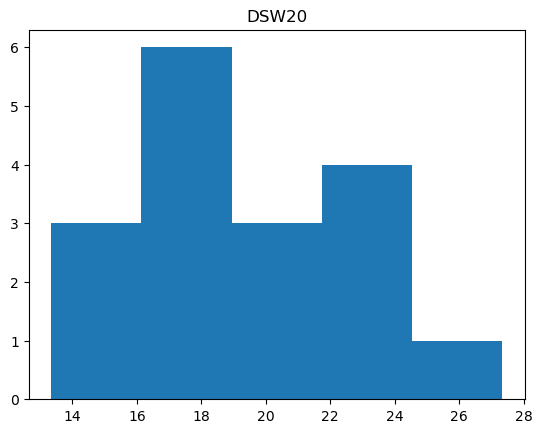

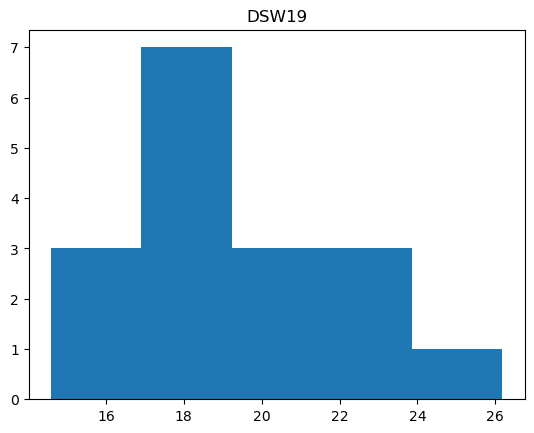

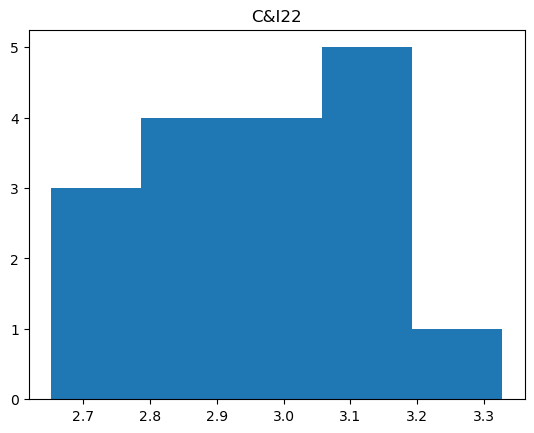

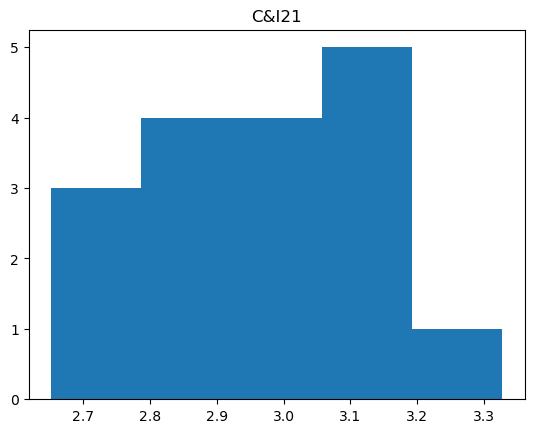

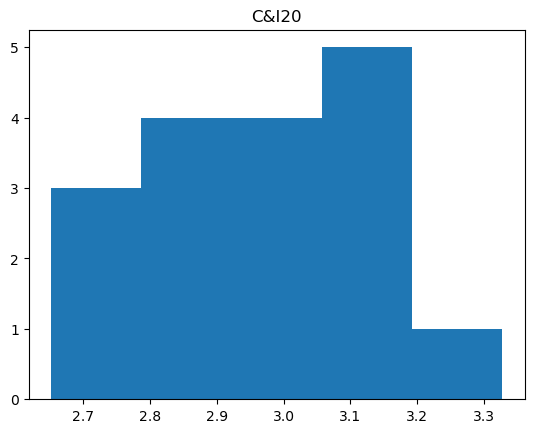

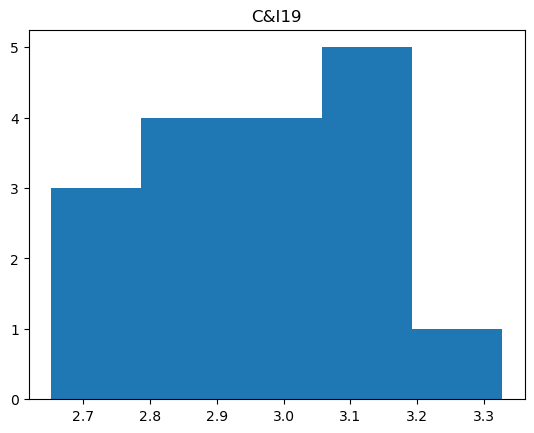

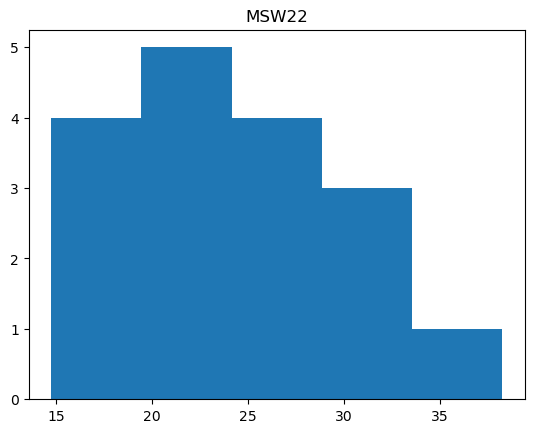

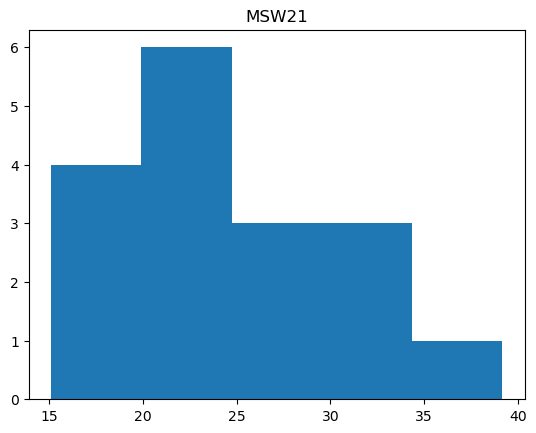

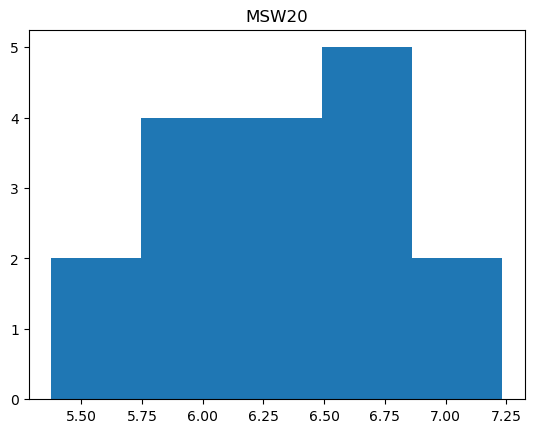

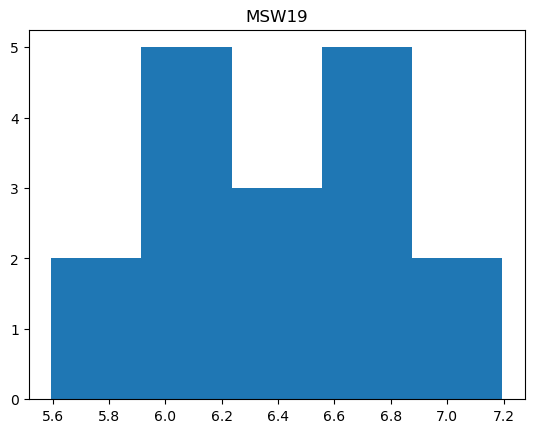

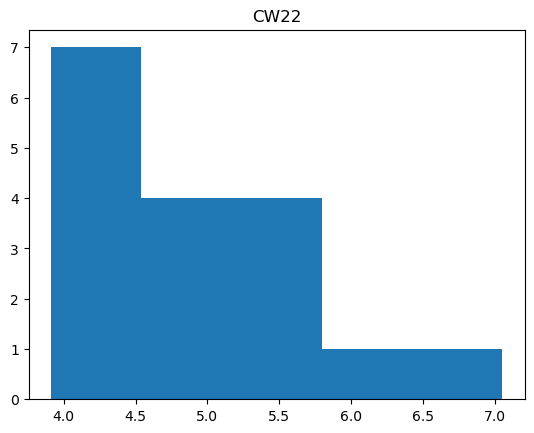

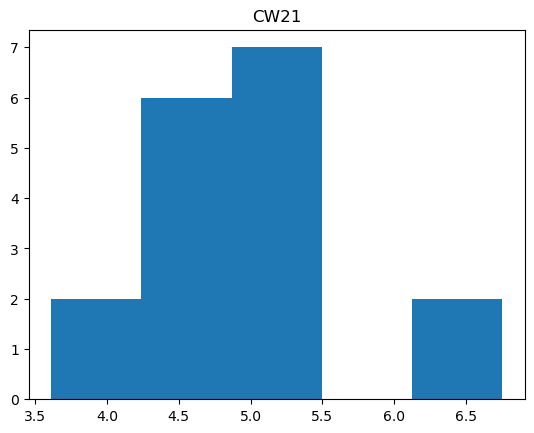

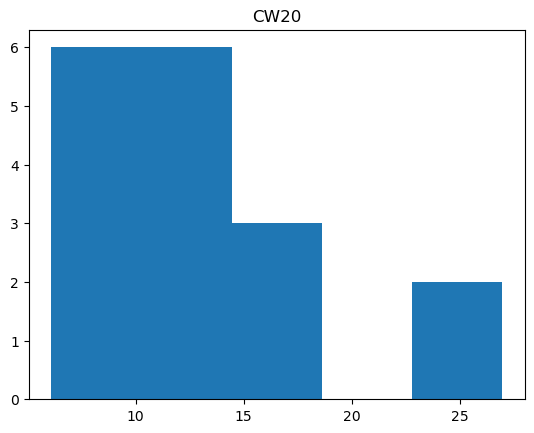

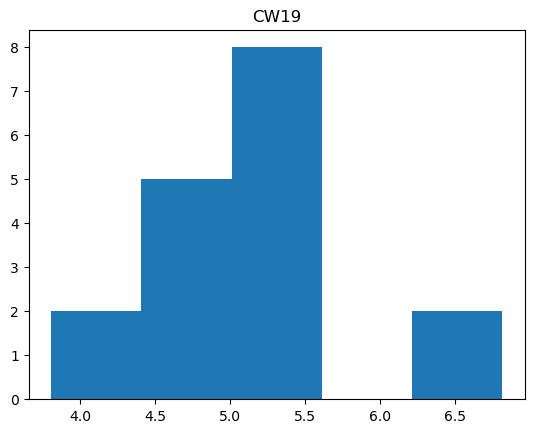

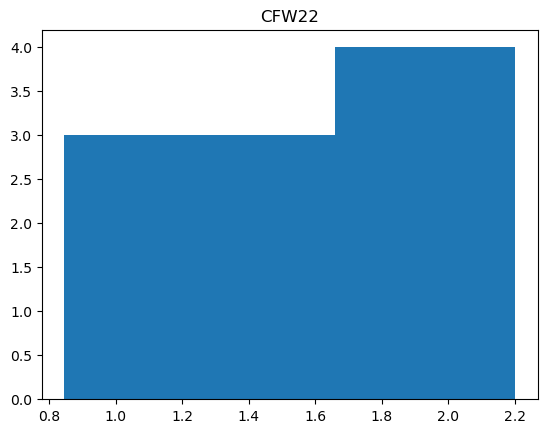

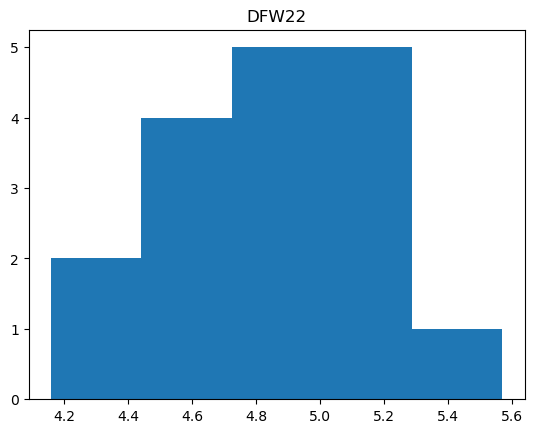

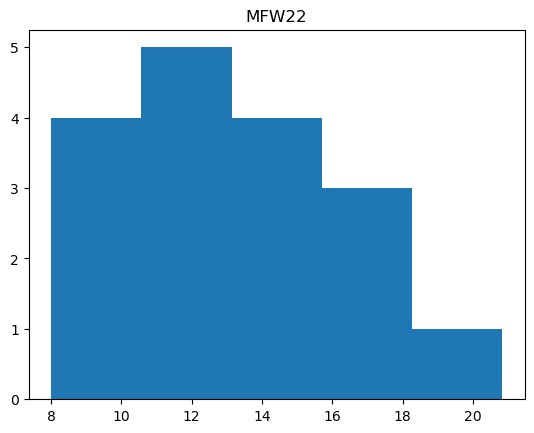

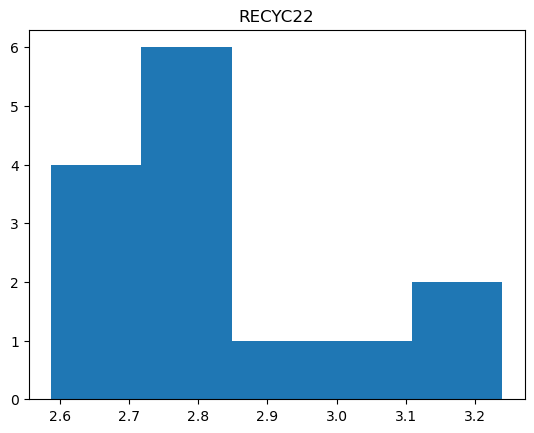

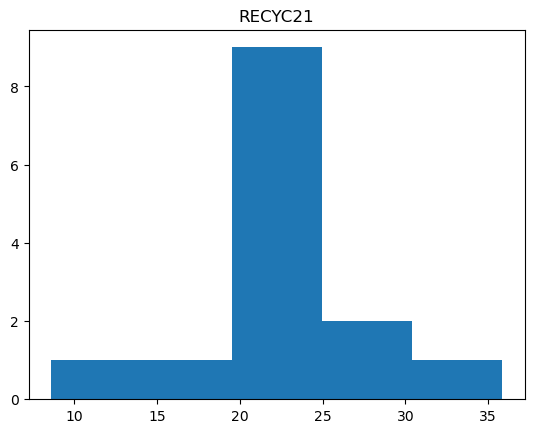

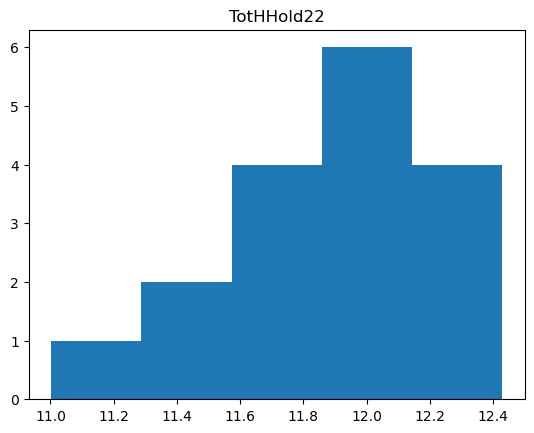

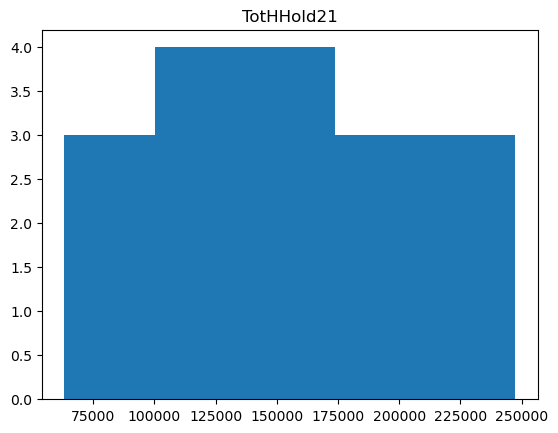

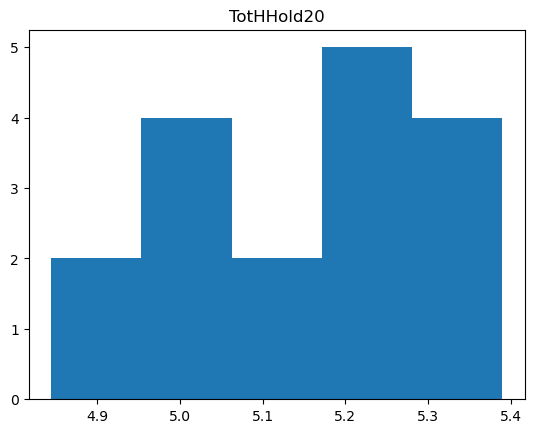

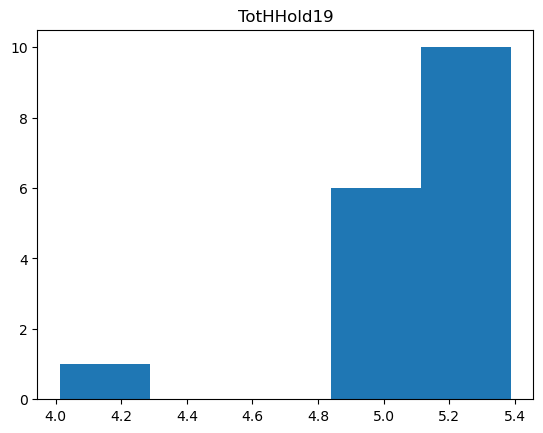

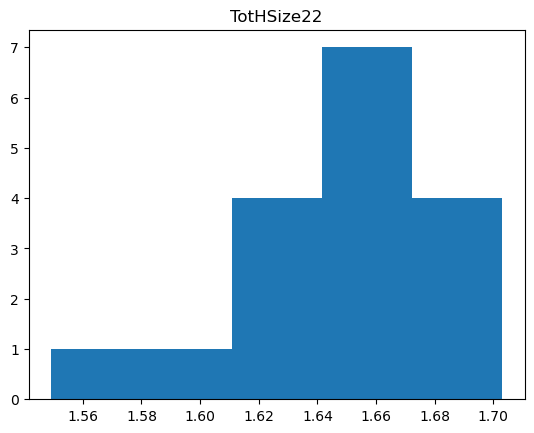

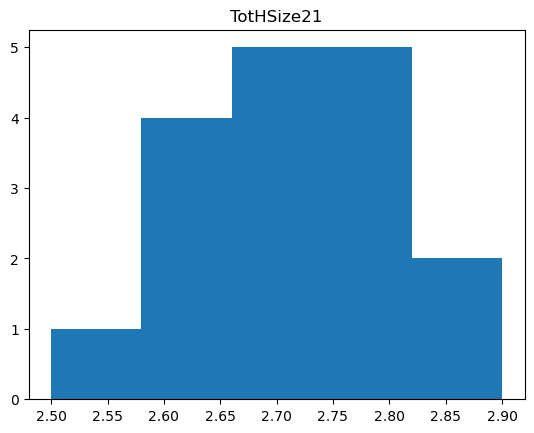

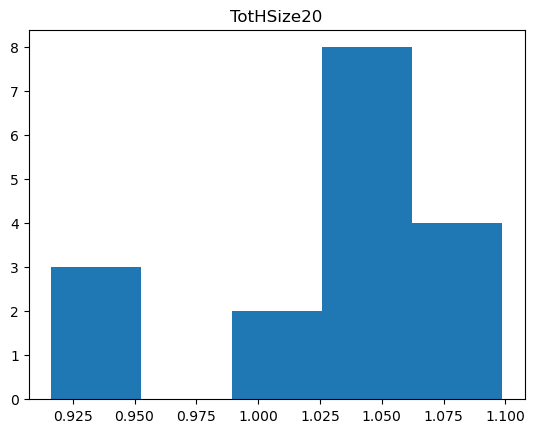

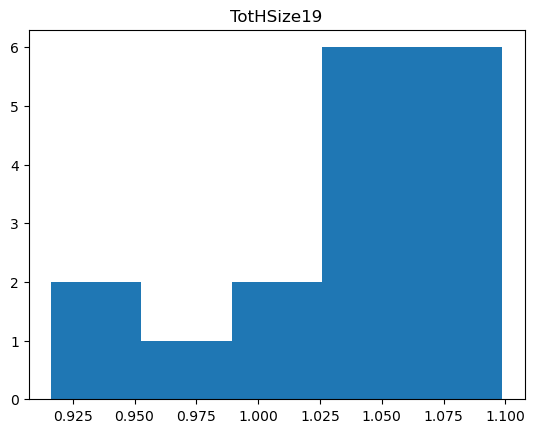

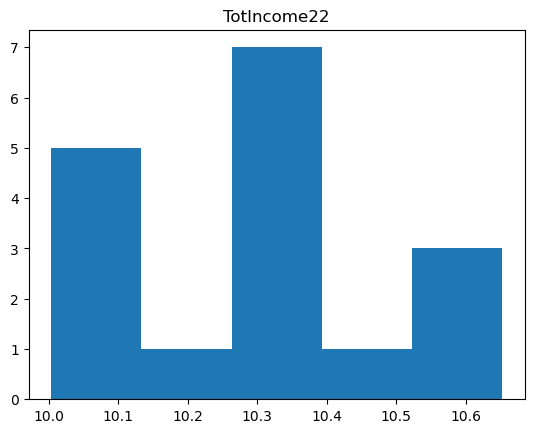

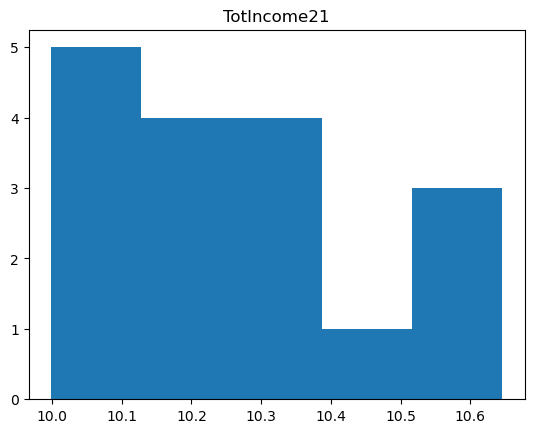

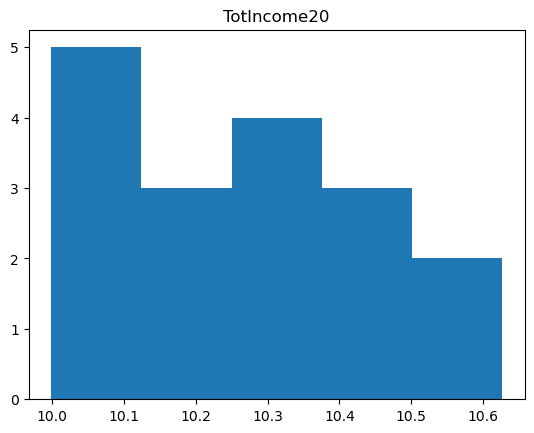

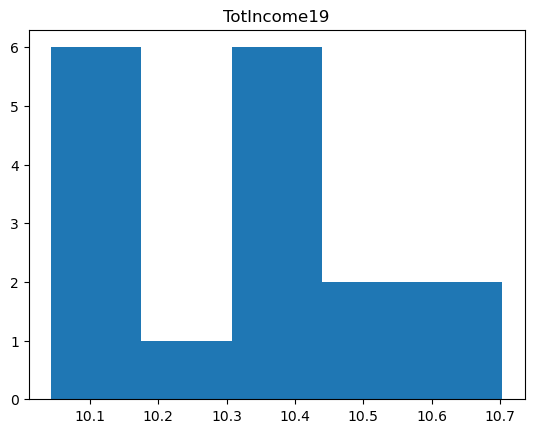

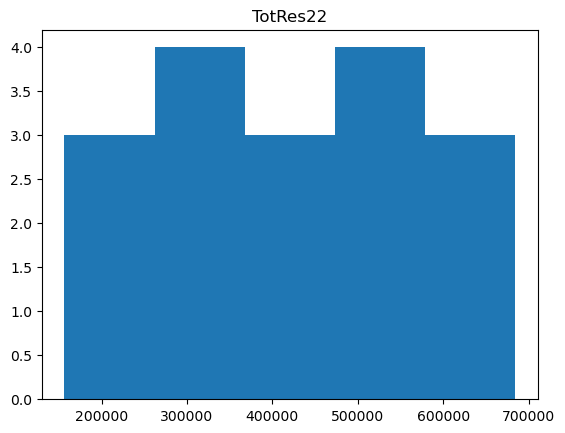

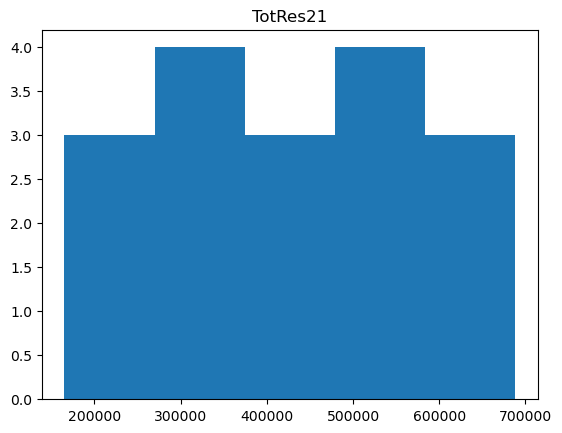

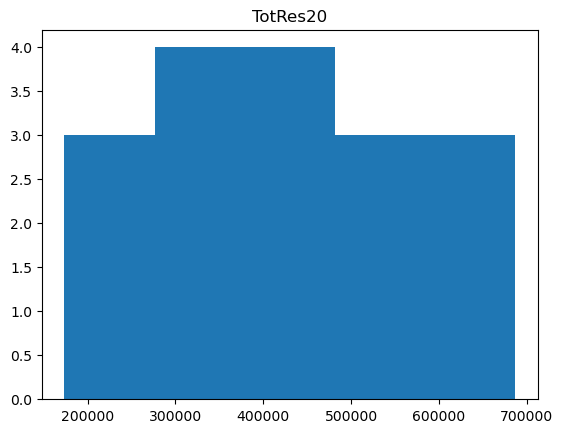

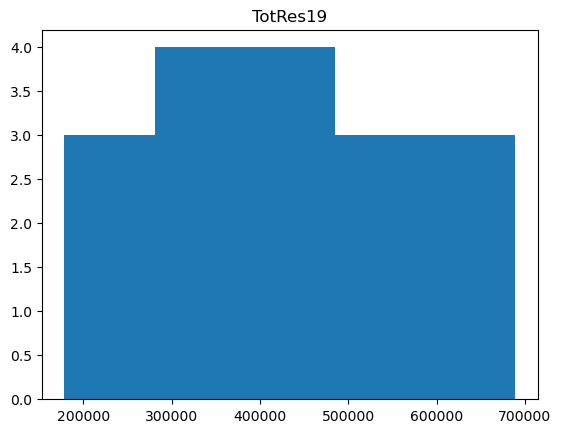

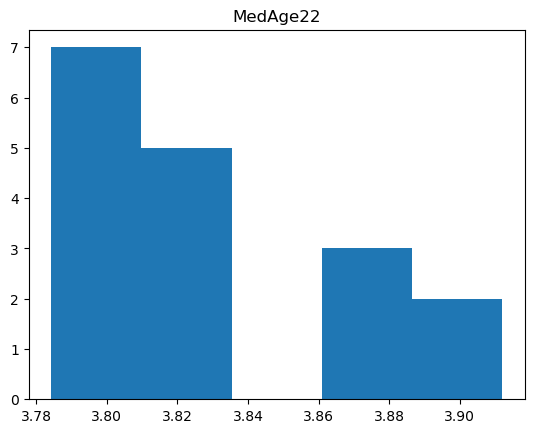

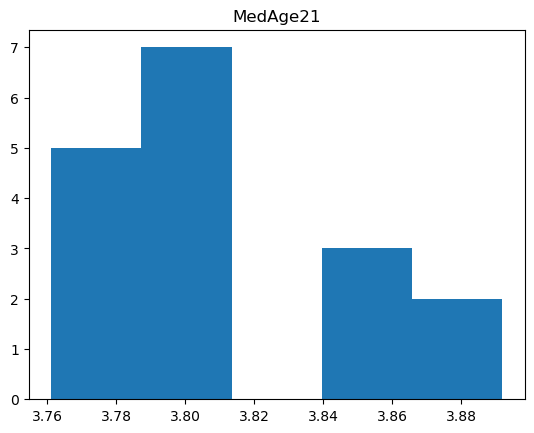

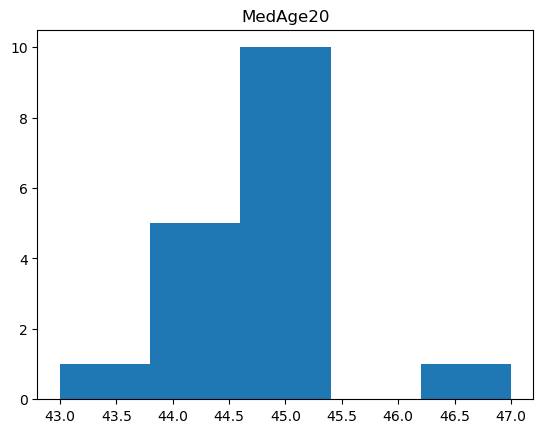

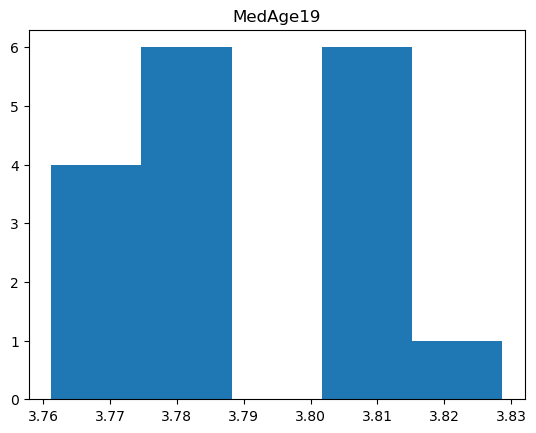

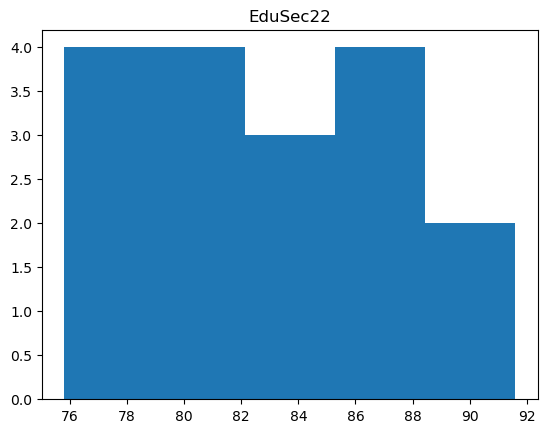

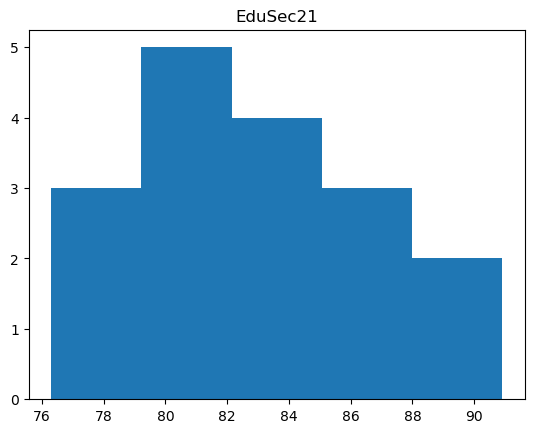

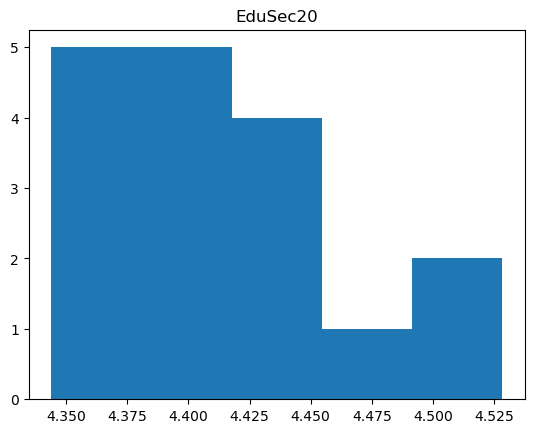

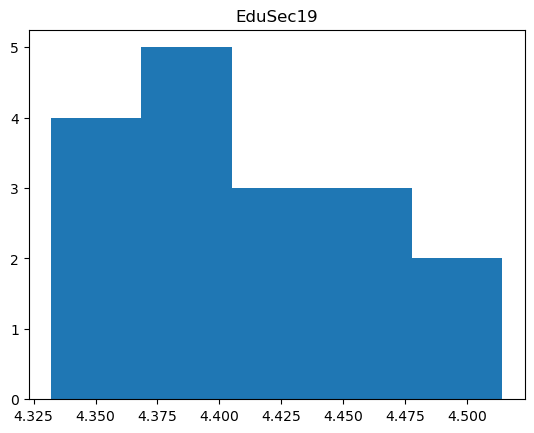

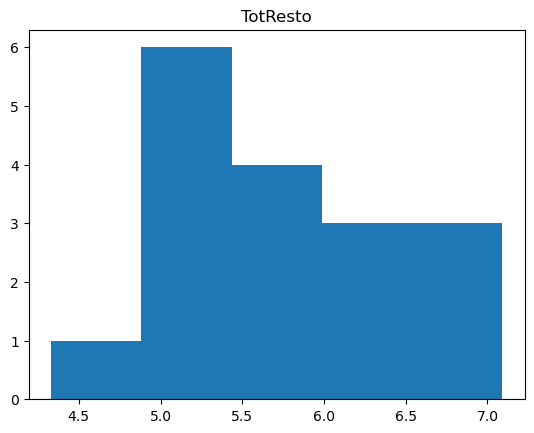

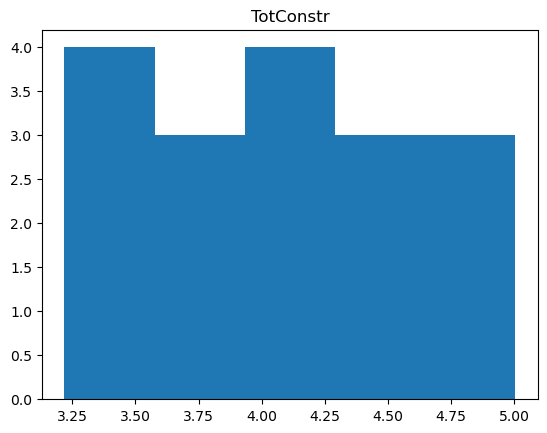

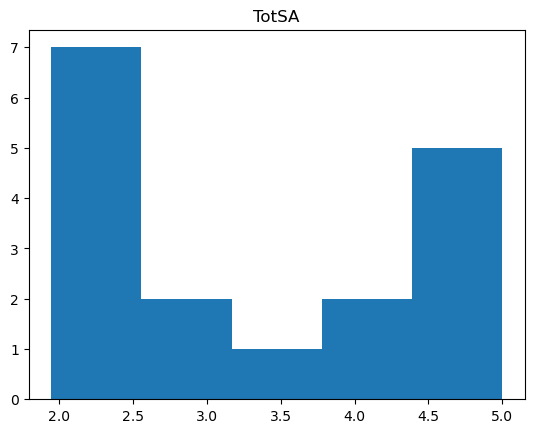

In [234]:
# Checking the distribution of all original house age categories
for i in IGS_gdf2.loc[:,'DSW22':'TotSA'].columns:
    plt.hist(IGS_gdf[i], bins=5)
    plt.title(i)
    plt.show()

# Standardise

In [327]:
#Standardise
IGS_gdf2['TotHHold22_PSM'] =IGS_gdf2['TotHHold22']/IGS_gdf2['TotSA']
IGS_gdf2['TotHHold21_PSM'] =IGS_gdf2['TotHHold21']/IGS_gdf2['TotSA']
IGS_gdf2['TotHHold20_PSM'] =IGS_gdf2['TotHHold20']/IGS_gdf2['TotSA']
IGS_gdf2['TotHHold19_PSM'] =IGS_gdf2['TotHHold19']/IGS_gdf2['TotSA']
IGS_gdf2['TotResto_PSM'] =IGS_gdf2['TotResto']/IGS_gdf2['TotSA']
IGS_gdf2['TotConstr_PSM'] =IGS_gdf2['TotConstr']/IGS_gdf2['TotSA']
IGS_gdf2['RECYC%_22'] =100*(IGS_gdf2['RECYC22']/IGS_gdf2['MSW22'])

#Mean
IGS_gdf2['DSW_M'] = (IGS_gdf2['DSW22'] + IGS_gdf2['DSW21'] + IGS_gdf2['DSW20'] + IGS_gdf2['DSW19'])/4
IGS_gdf2['C&I_M'] = (IGS_gdf2['C&I22'] + IGS_gdf2['C&I21'] + IGS_gdf2['C&I20'] + IGS_gdf2['C&I19'])/4
IGS_gdf2['MSW_M'] = (IGS_gdf2['MSW22'] + IGS_gdf2['MSW21'] + IGS_gdf2['MSW20'] + IGS_gdf2['MSW19'])/4
IGS_gdf2['CW_M'] = (IGS_gdf2['CW22'] + IGS_gdf2['CW21'] + IGS_gdf2['CW20'] + IGS_gdf2['CW19'])/4
#IGS_gdf2['CFW_M'] = (IGS_gdf2['CFW_22'] + IGS_gdf2['CFW_21'] + IGS_gdf2['CFW_20'] + IGS_gdf2['CFW_19'])/4
IGS_gdf2['RECYC_M'] = (IGS_gdf2['RECYC22'] + IGS_gdf2['RECYC21'])/2
IGS_gdf2['TotHHoldM'] = (IGS_gdf2['TotHHold22'] + IGS_gdf2['TotHHold21'] + IGS_gdf2['TotHHold20'] + IGS_gdf2['TotHHold19'])/4
IGS_gdf2['TotHSizeM'] = (IGS_gdf2['TotHSize22'] + IGS_gdf2['TotHSize21'] + IGS_gdf2['TotHSize20'] + IGS_gdf2['TotHSize19'])/4
IGS_gdf2['TotIncomeM'] = (IGS_gdf2['TotIncome22'] + IGS_gdf2['TotIncome21'] + IGS_gdf2['TotIncome20'] + IGS_gdf2['TotIncome19'])/4
IGS_gdf2['TotResM'] = (IGS_gdf2['TotRes22'] + IGS_gdf2['TotRes21'] + IGS_gdf2['TotRes20'] + IGS_gdf2['TotRes19'])/4
IGS_gdf2['MedAgeM'] = (IGS_gdf2['MedAge22'] + IGS_gdf2['MedAge21'] + IGS_gdf2['MedAge20'] + IGS_gdf2['MedAge19'])/4
IGS_gdf2['EduSecM'] = (IGS_gdf2['EduSec22'] + IGS_gdf2['EduSec21'] + IGS_gdf2['EduSec20'] + IGS_gdf2['EduSec19'])/4
IGS_gdf2['PopDenM']= IGS_gdf2['TotResM']/IGS_gdf['TotSA']
IGS_gdf3['PopDenM']= IGS_gdf3['TotResM']/IGS_gdf['TotSA']

# VIF

In [169]:
# Find design matrix for linear regression model using percentage leave as response variable 

#Domestic Waste
#y = IGS_gdf2['DSW22']
#X = IGS_gdf2[['TotIncome22', 'TotIncome21', 'TotIncome20', 'TotIncome19', 'TotHSize22', 'TotHSize21', 'TotHSize20', 'TotHSize19', 'MedAge22', 'MedAge21', 'MedAge20', 'MedAge19', 'TotHHold22_PSM', 'TotHHold21_PSM', 'TotHHold20_PSM', 'TotHHold19_PSM', 'EduSec22', 'EduSec21', 'EduSec20', 'EduSec19']]

# Calculate VIF for each explanatory variable
# Create new dataframe called 'vif'
#vif = pd.DataFrame()

# Calculate VIF and store in a new column name 'VIF'

#vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a new column named 'variable' and store the names of the variables
#vif['variable'] = X.columns

#view VIF for each explanatory variable 
#vif

,VIF,variable
0,inf,TotIncome22
1,inf,TotIncome21
2,inf,TotIncome20
3,inf,TotIncome19
4,inf,TotHSize22
5,inf,TotHSize21
6,inf,TotHSize20
7,inf,TotHSize19
8,inf,MedAge22
9,inf,MedAge21


In [260]:
#Making Recycling data
#IGS_gdf3 = IGS_gdf2

In [261]:
#IGS_gdf3 = IGS_gdf3.dropna(axis = 0)

In [262]:
#IGS_gdf3

In [605]:
# Find design matrix for linear regression model using percentage leave as response variable 

#Domestic Waste
y = IGS_gdf2['DSW_M']
X = IGS_gdf3[['TotHSizeM', 'MedAgeM', 'TotHHoldM']]

# Calculate VIF for each explanatory variable
# Create new dataframe called 'vif'
vif = pd.DataFrame()

# Calculate VIF and store in a new column name 'VIF'

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a new column named 'variable' and store the names of the variables
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,614.334955,TotHSizeM
1,594.419663,MedAgeM
2,8.933819,TotHHoldM


In [607]:
# Find design matrix for linear regression model using percentage leave as response variable 

#Domestic Food Waste
y = IGS_gdf2['DFW22']
X = IGS_gdf2[['MedAgeM', 'TotHHoldM']]

# Calculate VIF for each explanatory variable
# Create new dataframe called 'vif'
vif = pd.DataFrame()

# Calculate VIF and store in a new column name 'VIF'

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a new column named 'variable' and store the names of the variables
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,8.795358,MedAgeM
1,8.795358,TotHHoldM


In [599]:
# Find design matrix for linear regression model using percentage leave as response variable 

#Commercial Food Waste
y = IGS_gdf2['CFW22']
X = IGS_gdf2[['TotIncomeM', 'TotHSizeM', 'MedAgeM', 'TotHHoldM', 'EduSecM', 'TotResto_PSM']]

# Calculate VIF for each explanatory variable
# Create new dataframe called 'vif'
vif = pd.DataFrame()

# Calculate VIF and store in a new column name 'VIF'

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a new column named 'variable' and store the names of the variables
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,34121.534079,TotIncomeM
1,2897.803210,TotHSizeM
2,7270.224698,MedAgeM
3,11.816589,TotHHoldM
4,6283.599724,EduSecM
5,20.010196,TotResto_PSM


In [603]:
# Find design matrix for linear regression model using percentage leave as response variable 

#Commercial and Industrial Waste
y = IGS_gdf2['C&I_M']
X = IGS_gdf2[['TotIncomeM', 'MedAgeM']]

# Calculate VIF for each explanatory variable
# Create new dataframe called 'vif'
vif = pd.DataFrame()

# Calculate VIF and store in a new column name 'VIF'

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a new column named 'variable' and store the names of the variables
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif


,VIF,variable
0,1661.063363,TotIncomeM
1,1661.063363,MedAgeM


In [567]:
# Find design matrix for linear regression model using percentage leave as response variable 

#Commercial Food Waste 2
y = IGS_gdf2['CFW22']
X = IGS_gdf2[['TotIncomeM', 'EduSecM', 'TotResto_PSM']]

# Calculate VIF for each explanatory variable
# Create new dataframe called 'vif'
vif = pd.DataFrame()

# Calculate VIF and store in a new column name 'VIF'

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a new column named 'variable' and store the names of the variables
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,1040.866469,TotIncomeM
1,1117.946855,EduSecM
2,8.652503,TotResto_PSM


In [569]:
# Find design matrix for linear regression model using percentage leave as response variable 

#Municipal Solid Waste
y = IGS_gdf2['MSW_M']
X = IGS_gdf2[['MedAgeM', 'TotHHoldM']]

# Calculate VIF for each explanatory variable
# Create new dataframe called 'vif'
vif = pd.DataFrame()

# Calculate VIF and store in a new column name 'VIF'

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a new column named 'variable' and store the names of the variables
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,8.795358,MedAgeM
1,8.795358,TotHHoldM


In [604]:
# Find design matrix for linear regression model using percentage leave as response variable 

#Municipal Solid Waste 2
y = IGS_gdf2['MSW_M']
X = IGS_gdf2[['TotIncomeM', 'TotHSizeM', 'MedAgeM', 'TotHHoldM', 'EduSecM']]

# Calculate VIF for each explanatory variable
# Create new dataframe called 'vif'
vif = pd.DataFrame()

# Calculate VIF and store in a new column name 'VIF'

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a new column named 'variable' and store the names of the variables
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,33795.338102,TotIncomeM
1,2093.705654,TotHSizeM
2,6209.244804,MedAgeM
3,11.723081,TotHHoldM
4,5970.857206,EduSecM


In [570]:
# Find design matrix for linear regression model using percentage leave as response variable 

#Recycled Waste
y = IGS_gdf2['RECYC_M']
X = IGS_gdf2[['EduSecM', 'TotIncomeM', 'PopDenM']]

# Calculate VIF for each explanatory variable
# Create new dataframe called 'vif'
vif = pd.DataFrame()

# Calculate VIF and store in a new column name 'VIF'

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a new column named 'variable' and store the names of the variables
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,880.111806,EduSecM
1,884.998822,TotIncomeM
2,2.278223,PopDenM


# Model Running

In [579]:
#Determining Neighbourness using KNN (RUN FOR RECYCLING DATA)
wKNN8 = weights.KNN.from_dataframe(IGS_gdf3, k=3)
wKNN8.transform = 'r'

In [523]:
#Determining Neighbourness using KNN 
wKNN8 = weights.KNN.from_dataframe(IGS_gdf2, k=4)
wKNN8.transform = 'r'

In [543]:
#Testing for Residuals with Spatial Lag w/ABC efficiency and Qual Uni Note ABC and DEFG ran together causes both to be insignificant
variable_name=['TotHSizeM', 'MedAgeM', 'TotHHoldM']

DW_lagm = spreg.ML_Error(IGS_gdf2[['DSW_M']].values,
                  IGS_gdf2[variable_name].values,
                  w=wKNN8,
                  name_y='DSW_M',
                  name_x=variable_name)
print(DW_lagm.summary)

##Income and Education have p value > 0.01 hence statistically insignificant

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ML SPATIAL ERROR (METHOD = full)
---------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :       DSW_M                Number of Observations:          17
Mean dependent var  :     19.4427                Number of Variables   :           4
S.D. dependent var  :      3.4416                Degrees of Freedom    :          13
Pseudo R-squared    :      0.7748
Log likelihood      :    -26.8285
Sigma-square ML     :      1.2121                Akaike info criterion :      61.657
S.E of regression   :      1.1010                Schwarz criterion     :      64.990

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT       114.78741    

In [571]:
#Testing for Residuals with Spatial Lag w/ABC efficiency and Qual Uni Note ABC and DEFG ran together causes both to be insignificant
variable_name=['TotHSizeM', 'MedAgeM', 'TotHHoldM']

DW_lagm = spreg.ML_Lag(IGS_gdf2[['DSW_M']].values,
                  IGS_gdf2[variable_name].values,
                  w=wKNN8,
                  name_y='DSW_M',
                  name_x=variable_name)
print(DW_lagm.summary)

##Income and Education have p value > 0.01 hence statistically insignificant

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :       DSW_M                Number of Observations:          17
Mean dependent var  :     19.4427                Number of Variables   :           5
S.D. dependent var  :      3.4416                Degrees of Freedom    :          12
Pseudo R-squared    :      0.8202
Spatial Pseudo R-squared:  0.7976
Log likelihood      :    -30.1120
Sigma-square ML     :      2.0044                Akaike info criterion :      70.224
S.E of regression   :      1.4158                Schwarz criterion     :      74.390

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

In [544]:
#Testing for Residuals with Spatial Lag w/ABC efficiency and Qual Uni Note ABC and DEFG ran together causes both to be insignificant
variable_name=['MedAgeM', 'TotHHoldM']

DFW_lagm = spreg.ML_Error(IGS_gdf2[['DFW22']].values,
                  IGS_gdf2[variable_name].values,
                  w=wKNN8,
                  name_y='DFW22',
                  name_x=variable_name)
print(DFW_lagm.summary)

##Income and Education have p value > 0.01 hence statistically insignificant
# TotResto_PSM can be correlated but model performs the same with or without it -3.33 vs -2.9 AIC respectively

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ML SPATIAL ERROR (METHOD = full)
---------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :       DFW22                Number of Observations:          17
Mean dependent var  :      4.8219                Number of Variables   :           3
S.D. dependent var  :      0.3651                Degrees of Freedom    :          14
Pseudo R-squared    :      0.7010
Log likelihood      :      8.2765
Sigma-square ML     :      0.0195                Akaike info criterion :     -10.553
S.E of regression   :      0.1396                Schwarz criterion     :      -8.053

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        14.99955    

In [572]:
#Testing for Residuals with Spatial Lag w/ABC efficiency and Qual Uni Note ABC and DEFG ran together causes both to be insignificant
variable_name=['MedAgeM', 'TotHHoldM']

DFW_lagm = spreg.ML_Lag(IGS_gdf2[['DFW22']].values,
                  IGS_gdf2[variable_name].values,
                  w=wKNN8,
                  name_y='DFW22',
                  name_x=variable_name)
print(DFW_lagm.summary)

##Income and Education have p value > 0.01 hence statistically insignificant
# TotResto_PSM can be correlated but model performs the same with or without it -3.33 vs -2.9 AIC respectively

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :       DFW22                Number of Observations:          17
Mean dependent var  :      4.8219                Number of Variables   :           4
S.D. dependent var  :      0.3651                Degrees of Freedom    :          13
Pseudo R-squared    :      0.7504
Spatial Pseudo R-squared:  0.7138
Log likelihood      :      5.2013
Sigma-square ML     :      0.0313                Akaike info criterion :      -2.403
S.E of regression   :      0.1770                Schwarz criterion     :       0.930

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

In [545]:
#Testing for Residuals with Spatial Lag w/ABC efficiency and Qual Uni Note ABC and DEFG ran together causes both to be insignificant
variable_name=['TotIncomeM', 'MedAgeM']

CnI_lagm = spreg.ML_Error(IGS_gdf2[['C&I_M']].values,
                  IGS_gdf2[variable_name].values,
                  w=wKNN8,
                  name_y='C&I_M',
                  name_x=variable_name)
print(CnI_lagm.summary)

#Only significant statistic is Income and MedAge, with TotResto TotIncome is almost significant but TotResto itself is not need to find more variables for C&I Waste

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ML SPATIAL ERROR (METHOD = full)
---------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :       C&I_M                Number of Observations:          17
Mean dependent var  :      2.9666                Number of Variables   :           3
S.D. dependent var  :      0.1761                Degrees of Freedom    :          14
Pseudo R-squared    :      0.4706
Log likelihood      :     16.1465
Sigma-square ML     :      0.0077                Akaike info criterion :     -26.293
S.E of regression   :      0.0879                Schwarz criterion     :     -23.793

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        12.06840    

In [574]:
#Testing for Residuals with Spatial Lag w/ABC efficiency and Qual Uni Note ABC and DEFG ran together causes both to be insignificant
variable_name=['TotIncomeM', 'MedAgeM']

CnI_lagm = spreg.OLS(IGS_gdf2[['C&I_M']].values,
                  IGS_gdf2[variable_name].values,
                  w=wKNN8,
                  name_y='C&I_M',
                  name_x=variable_name)
print(CnI_lagm.summary)

#Only significant statistic is Income and MedAge, with TotResto TotIncome is almost significant but TotResto itself is not need to find more variables for C&I Waste

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :       C&I_M                Number of Observations:          17
Mean dependent var  :      2.9666                Number of Variables   :           3
S.D. dependent var  :      0.1761                Degrees of Freedom    :          14
R-squared           :      0.4731
Adjusted R-squared  :      0.3978
Sum squared residual:    0.261552                F-statistic           :      6.2855
Sigma-square        :       0.019                Prob(F-statistic)     :     0.01127
S.E. of regression  :       0.137                Log likelihood        :      11.360
Sigma-square ML     :       0.015                Akaike info criterion :     -16.720
S.E of regression ML:      0.1240                Schwarz criterion     :     -14.220

------------------------------------------------------------

In [546]:
#Testing for Residuals with Spatial Lag w/ABC efficiency and Qual Uni Note ABC and DEFG ran together causes both to be insignificant
variable_name=['TotIncomeM', 'EduSecM', 'TotResto_PSM']

CFW_lagm = spreg.ML_Error(IGS_gdf2[['CFW22']].values,
                  IGS_gdf2[variable_name].values,
                  w=wKNN8,
                  name_y='CFW_22',
                  name_x=variable_name)
print(CFW_lagm.summary)

#Removed Age not good, PopDenM important but makes the other variables insignificant with a worse model
#without Education TotResto becomes statistically insignificant, the model performs better with an acceptable AIC > 2 but just barely (19.5 vs 17.2)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ML SPATIAL ERROR (METHOD = full)
---------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :      CFW_22                Number of Observations:          17
Mean dependent var  :      1.5783                Number of Variables   :           4
S.D. dependent var  :      0.4229                Degrees of Freedom    :          13
Pseudo R-squared    :      0.4623
Log likelihood      :     -3.4825
Sigma-square ML     :      0.0870                Akaike info criterion :      14.965
S.E of regression   :      0.2950                Schwarz criterion     :      18.298

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        20.45631    

In [577]:
#Testing for Residuals with Spatial Lag w/ABC efficiency and Qual Uni Note ABC and DEFG ran together causes both to be insignificant
variable_name=['TotIncomeM', 'EduSecM', 'TotResto_PSM']

CFW_lagm = spreg.ML_Lag(IGS_gdf2[['CFW22']].values,
                  IGS_gdf2[variable_name].values,
                  w=wKNN8,
                  name_y='CFW_22',
                  name_x=variable_name)
print(CFW_lagm.summary)

#Removed Age not good, PopDenM important but makes the other variables insignificant with a worse model
#without Education TotResto becomes statistically insignificant, the model performs better with an acceptable AIC > 2 but just barely (19.5 vs 17.2)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :      CFW_22                Number of Observations:          17
Mean dependent var  :      1.5783                Number of Variables   :           5
S.D. dependent var  :      0.4229                Degrees of Freedom    :          12
Pseudo R-squared    :      0.4664
Spatial Pseudo R-squared:  0.4699
Log likelihood      :     -3.6390
Sigma-square ML     :      0.0898                Akaike info criterion :      17.278
S.E of regression   :      0.2997                Schwarz criterion     :      21.444

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

In [553]:
#Testing for Residuals with Spatial Lag w/ABC efficiency and Qual Uni Note ABC and DEFG ran together causes both to be insignificant
variable_name=['MedAgeM', 'TotHHoldM']

MSW_lagm = spreg.ML_Error(IGS_gdf2[['MSW_M']].values,
                  IGS_gdf2[variable_name].values,
                  w=wKNN8,
                  name_y='MSW_M',
                  name_x=variable_name)
print(MSW_lagm.summary)

#Removed Income, Education and HHSize, 
#Need more variables Maybe

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ML SPATIAL ERROR (METHOD = full)
---------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :       MSW_M                Number of Observations:          17
Mean dependent var  :     15.4985                Number of Variables   :           3
S.D. dependent var  :      3.3165                Degrees of Freedom    :          14
Pseudo R-squared    :      0.4941
Log likelihood      :    -36.7993
Sigma-square ML     :      4.1679                Akaike info criterion :      79.599
S.E of regression   :      2.0415                Schwarz criterion     :      82.098

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        56.86811    

In [578]:
#Testing for Residuals with Spatial Lag w/ABC efficiency and Qual Uni Note ABC and DEFG ran together causes both to be insignificant
variable_name=['MedAgeM', 'TotHHoldM']

MSW_lagm = spreg.ML_Lag(IGS_gdf2[['MSW_M']].values,
                  IGS_gdf2[variable_name].values,
                  w=wKNN8,
                  name_y='MSW_M',
                  name_x=variable_name)
print(MSW_lagm.summary)



REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :       MSW_M                Number of Observations:          17
Mean dependent var  :     15.4985                Number of Variables   :           4
S.D. dependent var  :      3.3165                Degrees of Freedom    :          13
Pseudo R-squared    :      0.6086
Spatial Pseudo R-squared:  0.5718
Log likelihood      :    -36.3857
Sigma-square ML     :      4.0584                Akaike info criterion :      80.771
S.E of regression   :      2.0145                Schwarz criterion     :      84.104

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

In [444]:
#Testing for Residuals with Spatial Lag w/ABC efficiency and Qual Uni Note ABC and DEFG ran together causes both to be insignificant
variable_name=[ 'TotConstr_PSM']

CW_lagm = spreg.ML_Lag(IGS_gdf2[['CW_M']].values,
                  IGS_gdf2[variable_name].values,
                  w=wKNN8,
                  name_y='CW_M',
                  name_x=variable_name)
print(CW_lagm.summary)

#Removed HHSize, EduSec and MedAgeM (r1 testing)

#Couldn't make a model for construction waste with my variables

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :        CW_M                Number of Observations:          17
Mean dependent var  :      6.9636                Number of Variables   :           3
S.D. dependent var  :      1.9530                Degrees of Freedom    :          14
Pseudo R-squared    :      0.3889
Spatial Pseudo R-squared:  0.0000
Log likelihood      :    -33.4635
Sigma-square ML     :      2.6619                Akaike info criterion :      72.927
S.E of regression   :      1.6315                Schwarz criterion     :      75.427

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

In [582]:
#Testing for Residuals with Spatial Lag w/ RECYCLING RUN KNN = 3 First!
variable_name=['EduSecM', 'TotIncomeM', 'PopDenM']

RECYC_lagm = spreg.OLS(IGS_gdf3[['RECYC_M']].values,
                  IGS_gdf3[variable_name].values,
                  w=wKNN8,
                  name_y='RECYC_M',
                  name_x=variable_name)
print(RECYC_lagm.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     RECYC_M                Number of Observations:          14
Mean dependent var  :     12.6111                Number of Variables   :           4
S.D. dependent var  :      3.0984                Degrees of Freedom    :          10
R-squared           :      0.2031
Adjusted R-squared  :     -0.0360
Sum squared residual:     99.4499                F-statistic           :      0.8496
Sigma-square        :       9.945                Prob(F-statistic)     :      0.4979
S.E. of regression  :       3.154                Log likelihood        :     -33.589
Sigma-square ML     :       7.104                Akaike info criterion :      75.179
S.E of regression ML:      2.6653                Schwarz criterion     :      77.735

------------------------------------------------------------

In [584]:
#Testing for Residuals with Spatial Lag w/ RECYCLING RUN KNN = 3 First!
variable_name=['EduSecM', 'TotIncomeM', 'PopDenM']

RECYC_lagm = spreg.ML_Lag(IGS_gdf3[['RECYC_M']].values,
                  IGS_gdf3[variable_name].values,
                  w=wKNN8,
                  name_y='RECYC_M',
                  name_x=variable_name)
print(RECYC_lagm.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     RECYC_M                Number of Observations:          14
Mean dependent var  :     12.6111                Number of Variables   :           5
S.D. dependent var  :      3.0984                Degrees of Freedom    :           9
Pseudo R-squared    :      0.4997
Spatial Pseudo R-squared:  0.1308
Log likelihood      :    -31.1993
Sigma-square ML     :      4.5373                Akaike info criterion :      72.399
S.E of regression   :      2.1301                Schwarz criterion     :      75.594

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

In [586]:
#Testing for Residuals with Spatial Lag w/ RECYCLING RUN KNN = 3 First!
variable_name=['EduSecM', 'TotIncomeM', 'PopDenM']

RECYC_lagm = spreg.ML_Error(IGS_gdf3[['RECYC_M']].values,
                  IGS_gdf3[variable_name].values,
                  w=wKNN8,
                  name_y='RECYC_M',
                  name_x=variable_name)
print(RECYC_lagm.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ML SPATIAL ERROR (METHOD = full)
---------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     RECYC_M                Number of Observations:          14
Mean dependent var  :     12.6111                Number of Variables   :           4
S.D. dependent var  :      3.0984                Degrees of Freedom    :          10
Pseudo R-squared    :      0.0696
Log likelihood      :    -30.0968
Sigma-square ML     :      3.6291                Akaike info criterion :      68.194
S.E of regression   :      1.9050                Schwarz criterion     :      70.750

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT       134.07799    

# Spatial AutoCorrelation

In [542]:
#OLS run
DW_lagm_moran = esda.moran.Moran(DW_lagm.u, wKNN8)
DFW_lagm_moran = esda.moran.Moran(DFW_lagm.u, wKNN8)
CnI_lagm_moran = esda.moran.Moran(CnI_lagm.u, wKNN8)
CFW_lagm_moran = esda.moran.Moran(CFW_lagm.u, wKNN8)
MSW_lagm_moran = esda.moran.Moran(MSW_lagm.u, wKNN8)

print(round(DW_lagm_moran.I,3))
print(round(DW_lagm_moran.p_sim,3))

print(round(DFW_lagm_moran.I,3))
print(round(DFW_lagm_moran.p_sim,3))

print(round(CnI_lagm_moran.I,3))
print(round(CnI_lagm_moran.p_sim,3))

print(round(CFW_lagm_moran.I,3))
print(round(CFW_lagm_moran.p_sim,3))

print(round(MSW_lagm_moran.I,3))
print(round(MSW_lagm_moran.p_sim,3))

-0.261
0.037
-0.257
0.039
-0.333
0.002
-0.065
0.469
0.173
0.052


In [531]:
#Spatial Lag run
DW_lagm_moran = esda.moran.Moran(DW_lagm.u, wKNN8)
DFW_lagm_moran = esda.moran.Moran(DFW_lagm.u, wKNN8)
CnI_lagm_moran = esda.moran.Moran(CnI_lagm.u, wKNN8)
CFW_lagm_moran = esda.moran.Moran(CFW_lagm.u, wKNN8)
MSW_lagm_moran = esda.moran.Moran(MSW_lagm.u, wKNN8)

print(round(DW_lagm_moran.I,3))
print(round(DW_lagm_moran.p_sim,3))

print(round(DFW_lagm_moran.I,3))
print(round(DFW_lagm_moran.p_sim,3))

print(round(CnI_lagm_moran.I,3))
print(round(CnI_lagm_moran.p_sim,3))

print(round(CFW_lagm_moran.I,3))
print(round(CFW_lagm_moran.p_sim,3))

print(round(MSW_lagm_moran.I,3))
print(round(MSW_lagm_moran.p_sim,3))

-0.163
0.22
-0.136
0.3
-0.22
0.085
-0.081
0.467
-0.04
0.368


In [548]:
#Spatial Error run
#Spatial Lag run
DW_lagm_moran = esda.moran.Moran(DW_lagm.u, wKNN8)
DFW_lagm_moran = esda.moran.Moran(DFW_lagm.u, wKNN8)
CnI_lagm_moran = esda.moran.Moran(CnI_lagm.u, wKNN8)
CFW_lagm_moran = esda.moran.Moran(CFW_lagm.u, wKNN8)
MSW_lagm_moran = esda.moran.Moran(MSW_lagm.u, wKNN8)

print(round(DW_lagm_moran.I,3))
print(round(DW_lagm_moran.p_sim,3))

print(round(DFW_lagm_moran.I,3))
print(round(DFW_lagm_moran.p_sim,3))

print(round(CnI_lagm_moran.I,3))
print(round(CnI_lagm_moran.p_sim,3))

print(round(CFW_lagm_moran.I,3))
print(round(CFW_lagm_moran.p_sim,3))

print(round(MSW_lagm_moran.I,3))
print(round(MSW_lagm_moran.p_sim,3))

-0.375
0.001
-0.345
0.001
-0.335
0.002
-0.094
0.436
0.249
0.02


In [ ]:
#Recycling Moran's I
#With OLS had a spatial correaltion, with spatial lag it did not, with spatial error it did
RECYC_lagm_moran = esda.moran.Moran(RECYC_lagm.u, wKNN8)

print(round(RECYC_lagm_moran.I,3))
print(round(RECYC_lagm_moran.p_sim,3))
RECYC_lagm_moran = esda.moran.Moran(RECYC_lagm.u, wKNN8)

print(round(RECYC_lagm_moran.I,3))
print(round(RECYC_lagm_moran.p_sim,3))

In [395]:
#Spatial Error Run
DW_lagm_moran = esda.moran.Moran(DW_lagm.u, wKNN8)
DFW_lagm_moran = esda.moran.Moran(DFW_lagm.u, wKNN8)
CnI_lagm_moran = esda.moran.Moran(CnI_lagm.u, wKNN8)
CFW_lagm_moran = esda.moran.Moran(CFW_lagm.u, wKNN8)
MSW_lagm_moran = esda.moran.Moran(MSW_lagm.u, wKNN8)
CW_lagm_moran = esda.moran.Moran(CW_lagm.u, wKNN8)
print(round(DW_lagm_moran.I,3))
print(round(DW_lagm_moran.p_sim,3))

print(round(DFW_lagm_moran.I,3))
print(round(DFW_lagm_moran.p_sim,3))

print(round(CnI_lagm_moran.I,3))
print(round(CnI_lagm_moran.p_sim,3))

print(round(CFW_lagm_moran.I,3))
print(round(CFW_lagm_moran.p_sim,3))

print(round(MSW_lagm_moran.I,3))
print(round(MSW_lagm_moran.p_sim,3))

#Spatial Correlation Significant for OLS model, but not Spatial Lag, 

-0.384
0.003
-0.368
0.001
-0.326
0.006
-0.238
0.051
0.178
0.039


In [587]:
#Recycling Moran's I
#With OLS had a spatial correaltion, with spatial lag it did not, with spatial error it did
RECYC_lagm_moran = esda.moran.Moran(RECYC_lagm.u, wKNN8)

print(round(RECYC_lagm_moran.I,3))
print(round(RECYC_lagm_moran.p_sim,3))

-0.465
0.001


# GWR and MGWR (Not enough spatial units n.a)

In [500]:
IGS_gdf2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [483]:
#IGS_gdf2['lon'] = IGS_gdf2['geometry'].x
#IGS_gdf2['lat'] = IGS_gdf2['geometry'].y

#IGS_gdf2['lon'] = IGS_gdf2.point_object.x
#IGS_gdf2['lat'] = IGS_gdf2.point_object.y

#IGS_gdf2['lon'] = IGS_gdf2.point_geometry.apply(lambda p: p.x)
#IGS_gdf2['lat'] = IGS_gdf2.point_geometry.apply(lambda p: p.y)

IGS_gdf2 = IGS_gdf2.to_crs('EPSG:4326')

IGS_gdf2['lon'] = IGS_gdf2.centroid.x  
IGS_gdf2['lat'] = IGS_gdf2.centroid.y

In [484]:

IGS_gdf2['lat']

0     22.280407
1     22.273890
2     22.227960
3     22.272111
4     22.318175
5     22.312255
6     22.331892
7     22.344022
8     22.306869
9     22.336310
10    22.521142
11    22.297140
12    22.389466
13    22.476789
14    22.365447
15    22.377325
16    22.454064
Name: lat, dtype: float64

In [509]:
#Prepare dataset inputs
#First prepare the dependent variable
g_y = IGS_gdf2['DSW_M'].values.reshape((-1,1)) # reshape is needed to have column array

#Second, prepare the independent variables
g_X = IGS_gdf2[['TotHSizeM', 'MedAgeM', 'TotHHoldM']].values

#Third, we need to define the longitude and latitude information for GWR 
u = IGS_gdf2['lat']
v = IGS_gdf2['lon']

#Combine them as coordinates
g_coords = list(zip(u,v))

# Select bandwidth for kernel
bw = mgwr.sel_bw.Sel_BW(g_coords, 
                  g_y, # Independent variable
                  g_X, # Dependent variable
                  fixed=17, # True for fixed bandwidth and false for adaptive bandwidth
                  spherical=True) # Spherical coordinates (long-lat) or projected coordinates
bw = 17

In [511]:
#Necessary first step for bw idk why, but doesn't work unless you run these two lines first
#bw.search()
#bw.bw[0]


AttributeError: 'int' object has no attribute 'bw'

In [512]:
# Building the Geographically Weighted Regression Model
model = mgwr.gwr.GWR(g_coords, # a collection of n sets of x and y coordinates
                     g_y, # dependent variable
                     g_X, # independent variables
                     17) # bandwidth value  ( we use N nearest neighbours)

# Fit the model with particular estimations 
results = model.fit()
results.summary()

Model type                                                         Gaussian
Number of observations:                                                  17
Number of covariates:                                                     4

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             36.503
Log-likelihood:                                                     -30.617
AIC:                                                                 69.235
AICc:                                                                76.689
BIC:                                                                 -0.329
R2:                                                                   0.807
Adj. R2:                                                              0.763

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [ ]:

# Search for optimum bandwidth for each of the variables, you should get 3 of them
mgwr_bw = mgwr_selector.search()

# print the bandwidths
print(mgwr_bw)

In [ ]:
#Calibrate MGWR model
mgwr_selector = Sel_BW(g_coords, g_y, g_X, multi=True)